<a href="https://www.kaggle.com/code/search4/black-friday-eda-archana-yadav?scriptVersionId=142107055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Name: Archana Yadav
### Dataset : Black Friday Sales
    Dataset shape: (550068, 12)
    
    columns: User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase
    
### Operations: Exploratory Data Analysis (Data Cleaning, Handling Missing Values, Data Visualization)

In [1]:
# Import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Read Dataset 

In [2]:
black_df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
black_df.head()      # Display first 5 data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
black_df.tail() # Display last 5 data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [4]:
black_df.shape

(550068, 12)

In [5]:
black_df.describe()  # Staticstical information of numeric data

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Preprocessing

##### Check Missing Values 

In [6]:
black_df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

##### Check duplicate data

In [7]:
black_df.duplicated().sum()

0

In [8]:
# Creating copy of main DataFrame 
black_friday = black_df.copy()

In [9]:
# Droping not required columns for further operation 
black_friday.drop('User_ID',axis=1,inplace=True)
black_friday.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Unique_values

In [10]:
black_friday.apply(lambda x : x.unique(), axis = 0)

Product_ID                    [P00069042, P00248942, P00087842, P00085442, P...
Gender                                                                   [F, M]
Age                              [0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Occupation                    [10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,...
City_Category                                                         [A, C, B]
Stay_In_Current_City_Years                                     [2, 4+, 3, 1, 0]
Marital_Status                                                           [0, 1]
Product_Category_1            [3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 1...
Product_Category_2            [nan, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5...
Product_Category_3            [nan, 14.0, 17.0, 5.0, 4.0, 16.0, 15.0, 8.0, 9...
Purchase                      [8370, 15200, 1422, 1057, 7969, 15227, 19215, ...
dtype: object

#### Value counts

In [11]:
def value_count(df_ob):
    
    for i in df_ob.columns:
        print(f'{i} \n{df_ob[i].value_counts()}\n')
    
value_count(black_friday)

Product_ID 
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

Gender 
M    414259
F    135809
Name: Gender, dtype: int64

Age 
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Occupation 
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

City_Category 
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Stay_In_Current_City_Years 
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

Marital_Status 
0  

#### Fill NA in Product_Category_2 column

In [12]:
# Grouped 'Gender','Age','Occupation','Marital_Status' & Product_Category_2 by mode for filling 
#null values in Product_Category_2

group_cat2=black_friday.loc[black_friday['Product_Category_2'].notna()].groupby(['Gender','Age',
        'Occupation','Marital_Status']).agg({'Product_Category_2':(lambda x: pd.Series.mode(x)[0])})
cat2 = group_cat2.reset_index()

In [13]:
def fill_cat2(x):
    
    '''This Function takes x as a parameter which contain tuple ('Gender','Age','Occupation',
    'Marital_Status') and compare this with respective columns of cat2 (grouped dataframe) and 
    returns mode values for fill null values '''
    
    return cat2.loc[(x[0]==cat2['Gender']) & (x[1]==cat2['Age']) & (x[2]==cat2['Occupation']) &
                    (x[3]==cat2['Marital_Status']),'Product_Category_2'].values

# Filling null value

black_friday.loc[black_friday['Product_Category_2'].isna(),'Product_Category_2']=black_friday[
                black_friday['Product_Category_2'].isna()].loc[:,['Gender','Age', 'Occupation', 
                                                      'Marital_Status']].apply(fill_cat2,axis=1)

In [14]:
# Convert obj to int8
black_friday['Product_Category_2']=black_friday['Product_Category_2'].astype('int8')

#### Fill NA in Product_Category_3 column

In [15]:
# Grouping by mode 
group_cat3=black_friday.loc[black_friday['Product_Category_3'].notna()].groupby(['Gender',
'Age','Occupation','Marital_Status']).agg({'Product_Category_3':(lambda x: pd.Series.mode(x)[0])})

cat3 = group_cat3.reset_index()

In [16]:
def add_cat3(x):
    '''This function returns mode value for respective row in Product_Category_3 for filling Null value'''
    return cat3.loc[(x[0]==cat3['Gender']) & (x[1]==cat3['Age']) & (x[2]==cat3['Occupation']) &
                    (x[3]==cat3['Marital_Status']),'Product_Category_3'].values

# Fill NA
black_friday.loc[black_friday['Product_Category_3'].isna(),'Product_Category_3']=black_friday[black_friday[
'Product_Category_3'].isna()].loc[:,['Gender','Age', 'Occupation', 'Marital_Status']].apply(add_cat3,axis=1)

In [17]:
# Replace empty list [] with np.nan
black_friday.loc[black_friday['Product_Category_3'].str.len()==0,'Product_Category_3']=np.nan

In [18]:
black_friday.isna().sum()

Product_ID                     0
Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Product_Category_3            15
Purchase                       0
dtype: int64

In [19]:
# Before dropping the null values cross check the all info 
black_friday[black_friday['Product_Category_3'].isna()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
28981,P00250642,M,0-17,13,C,1,0,11,8,NaN,4423
28982,P00085342,M,0-17,13,C,1,0,10,13,NaN,18839
68080,P00265042,M,0-17,13,C,1,0,16,8,NaN,12333
106625,P00177342,M,0-17,13,C,1,0,8,8,NaN,9782
145402,P00285842,M,0-17,13,C,1,0,5,8,NaN,7068
145403,P00267542,M,0-17,13,C,1,0,1,16,NaN,15686
145404,P00139542,M,0-17,13,C,1,0,5,8,NaN,7137
223409,P00220442,M,0-17,13,C,1,0,5,14,NaN,8896
301559,P00315442,M,0-17,13,C,1,0,1,8,NaN,11450
379799,P00148742,M,0-17,13,C,1,0,8,17,NaN,6198


In [20]:
black_friday[(black_friday['Gender']=='M') & (black_friday['Age']=='0-17') & (black_friday['Occupation']==13) & 
             (black_friday['City_Category']=='C') & (black_friday['Stay_In_Current_City_Years']=='1') & (black_friday['Marital_Status']==0)]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
28981,P00250642,M,0-17,13,C,1,0,11,8,NaN,4423
28982,P00085342,M,0-17,13,C,1,0,10,13,NaN,18839
68080,P00265042,M,0-17,13,C,1,0,16,8,NaN,12333
106625,P00177342,M,0-17,13,C,1,0,8,8,NaN,9782
145402,P00285842,M,0-17,13,C,1,0,5,8,NaN,7068
145403,P00267542,M,0-17,13,C,1,0,1,16,NaN,15686
145404,P00139542,M,0-17,13,C,1,0,5,8,NaN,7137
223409,P00220442,M,0-17,13,C,1,0,5,14,NaN,8896
301559,P00315442,M,0-17,13,C,1,0,1,8,NaN,11450
379799,P00148742,M,0-17,13,C,1,0,8,17,NaN,6198


#### Drop Null values

In [21]:
black_friday.dropna(axis=0,inplace=True)

In [22]:
# Convert obj into int8
black_friday['Product_Category_3']=black_friday.Product_Category_3.astype('int8')

In [23]:
black_friday.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [24]:
black_friday.dtypes

Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2              int8
Product_Category_3              int8
Purchase                       int64
dtype: object

In [25]:
# Creating copy for next operation
b_friday = black_friday.copy()

#### map range variables into integers in Age Column

In [26]:
sorted_age = sorted(b_friday['Age'].unique()) # Sorting the Age's values into ascending order
dictionary = {}
def fun(x):
    '''This function convert range into integer by taking mean of range values'''
    global dictionary
    if x == '55+':
        dictionary.update({x: 60})
    else:
        split_x = x.split('-')
        dictionary.update( { x : (int(split_x[0]) + int(split_x[1])) / 2} )
    return dictionary

res = list(map(lambda x : fun(x), sorted_age))[-1]

In [27]:
# Replace range into integer (mean)
b_friday['Age'] = b_friday['Age'].replace(res)

#### Convert categorical data into integer in Gender Column

In [28]:
b_friday['Gender']=b_friday['Gender'].map({'F':0,'M':1})

In [29]:
# b_friday['Gender'].replace(['F','M'],[0,1],inplac.e=True)

In [30]:
b_friday.head(7)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,8.5,10,A,2,0,3,4,5,8370
1,P00248942,0,8.5,10,A,2,0,1,6,14,15200
2,P00087842,0,8.5,10,A,2,0,12,4,5,1422
3,P00085442,0,8.5,10,A,2,0,12,14,5,1057
4,P00285442,1,60.0,16,C,4+,0,8,8,17,7969
5,P00193542,1,30.5,15,A,3,0,1,2,16,15227
6,P00184942,1,48.0,7,B,2,1,1,8,17,19215


#### Drop duplicate values

In [31]:
b_friday.duplicated().sum()

113

In [32]:
b_friday.drop_duplicates(inplace= True)

In [33]:
b_friday.shape

(549940, 11)

## Data Visualization

<Axes: xlabel='Purchase', ylabel='Count'>

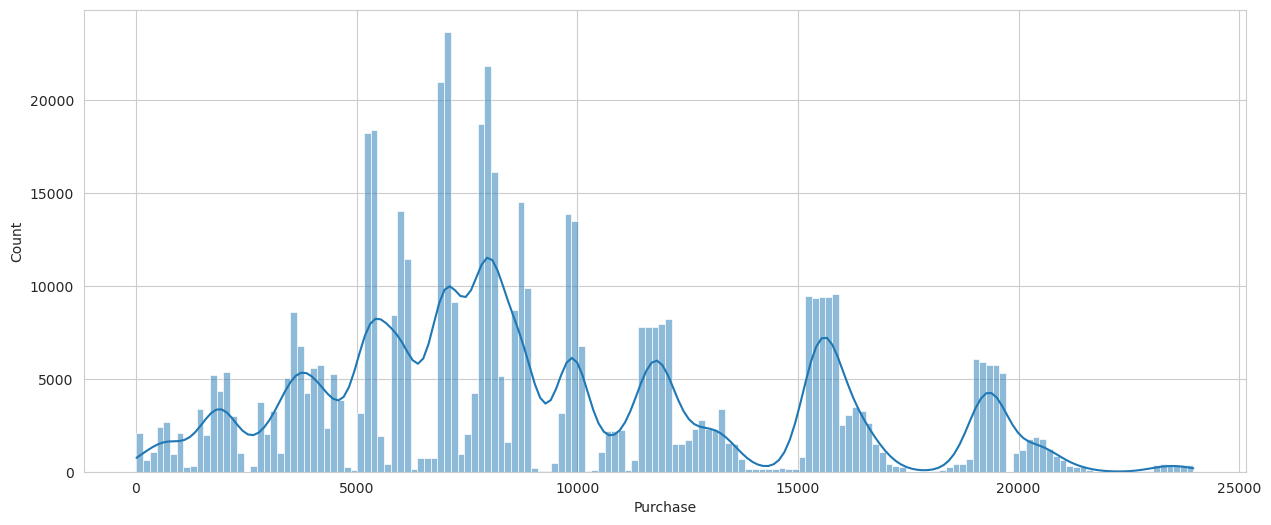

In [34]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.histplot(data=b_friday['Purchase'], kde=True)

Most of the Purchase are done in between 7000 to 8500

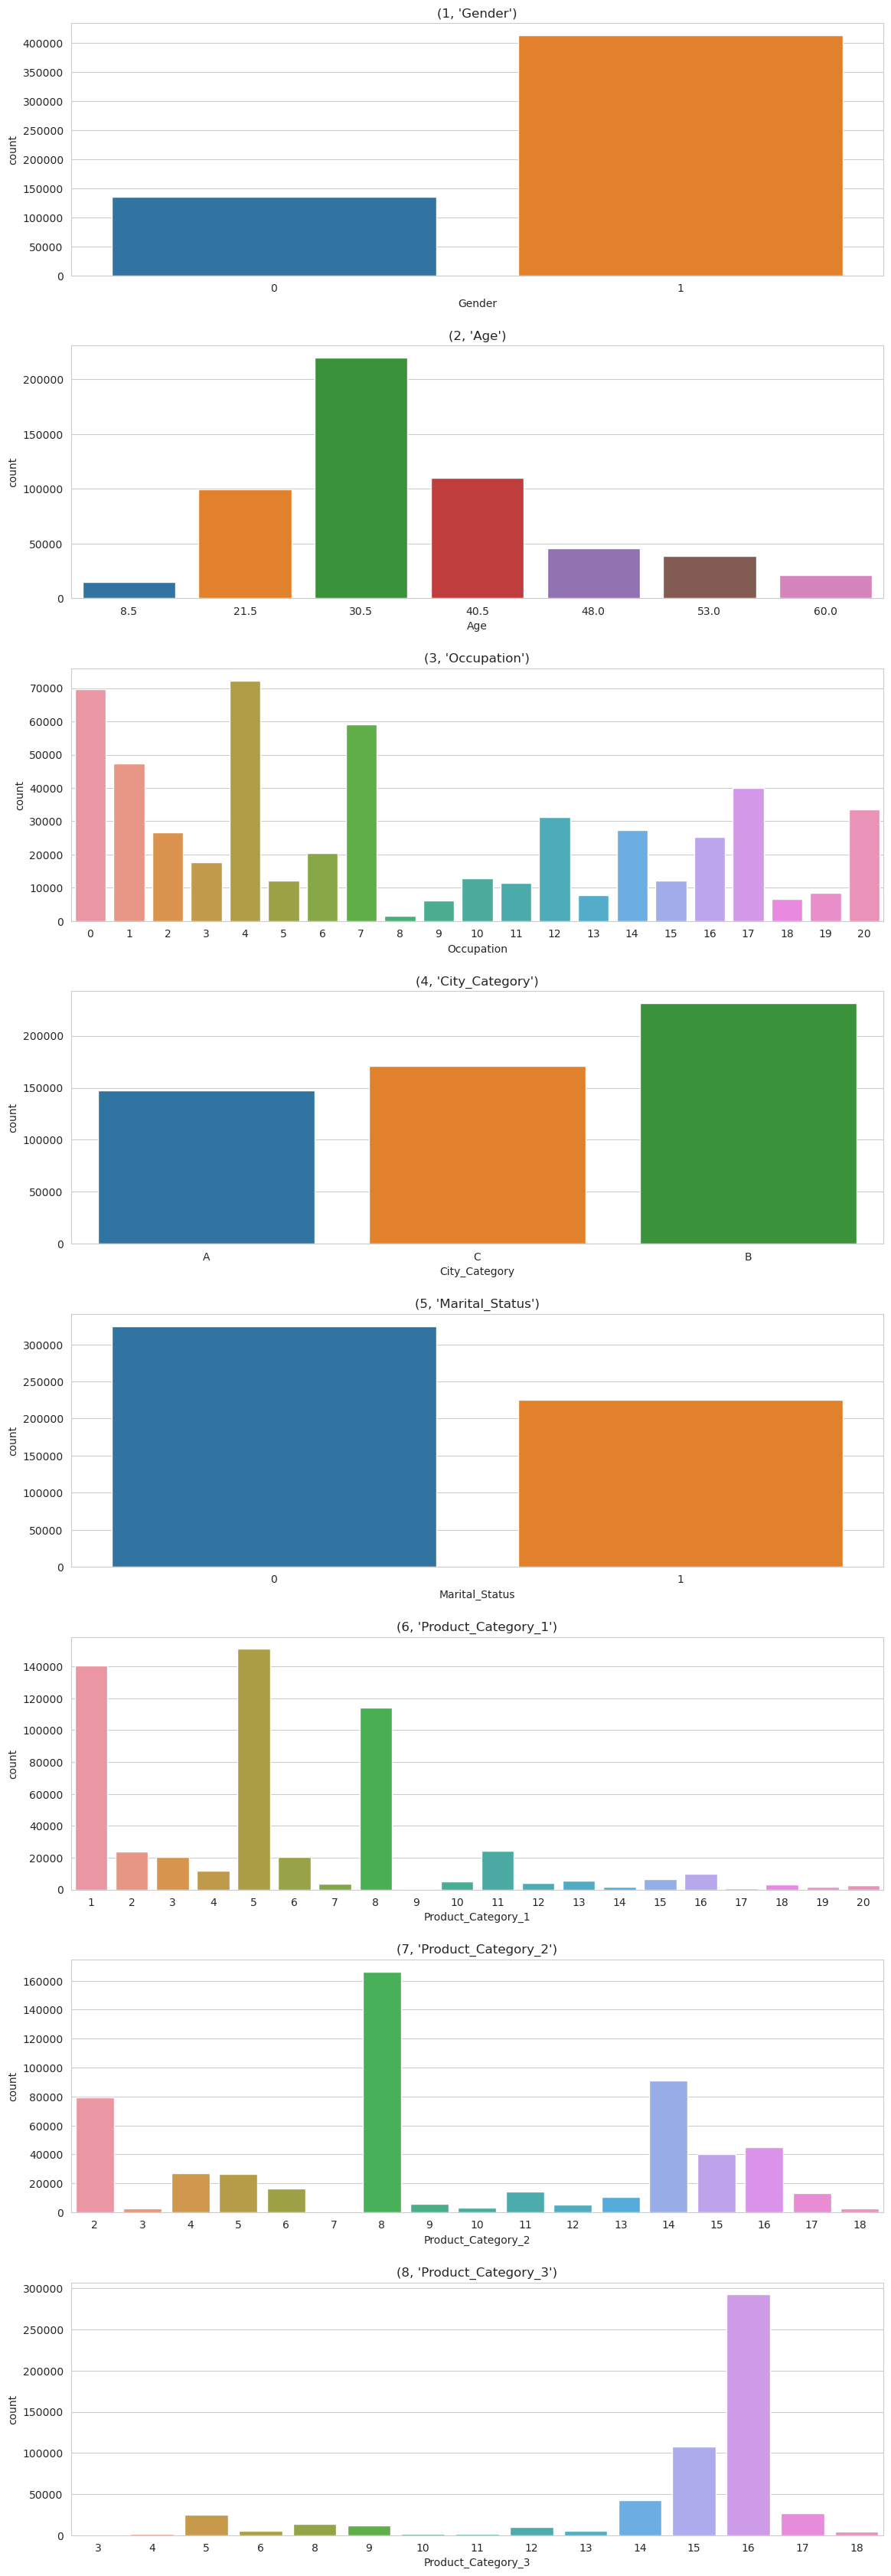

In [35]:
def single_col_count(list1):
    
    fig,axes=plt.subplots(nrows=len(list1),ncols=1,figsize=(12,34))
    sns.set_style("whitegrid")

    for l in enumerate(list1):  
        s = sns.countplot(ax=axes[l[0]],x=b_friday[l[1]])
        s.set_title((l[0]+1,l[1]))
        
    plt.tight_layout(pad=2)
list1= ['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
single_col_count(list1)

#### Countplot 
1. 'Gender' : (Female=0,Male=1)

    As per the plot Male data are far more than Female data, so two posibilities are there: 

    1. Having less data related to female customer 
    2. Female customer are less or they are using male's ID (in case of Marital = Yes)
    
2. 'Age' : ('0-17' = 8.5, '18-25' = 21.5, '26-35'=30.5, '36-45'=40.5, '46-50'=48.0, '51-55' = 53.0, '55+'= 60.0)

    Here you can observed that the age range between 26 to 35 are more than other age group

3. 'Occupation' : most customers having occupation 4,0 and 7 

4. 'City_Category' : most of the customers are from City_Category 'B'

5. 'Marital_Status' : (Yes = 0, No= 1)

    Most of the customers are married 

6. 'Product_Category_1' : mostly the product purchase in Product_Category_1 are from 5,1 and 8

7. 'Product_Category_2' : highest selling in Product_Category_2 is 8

8. 'Product_Category_3' : 16 is hightest selling product_category as compare ith other product category

#### Plot Purchase v/s other columns by mean and count

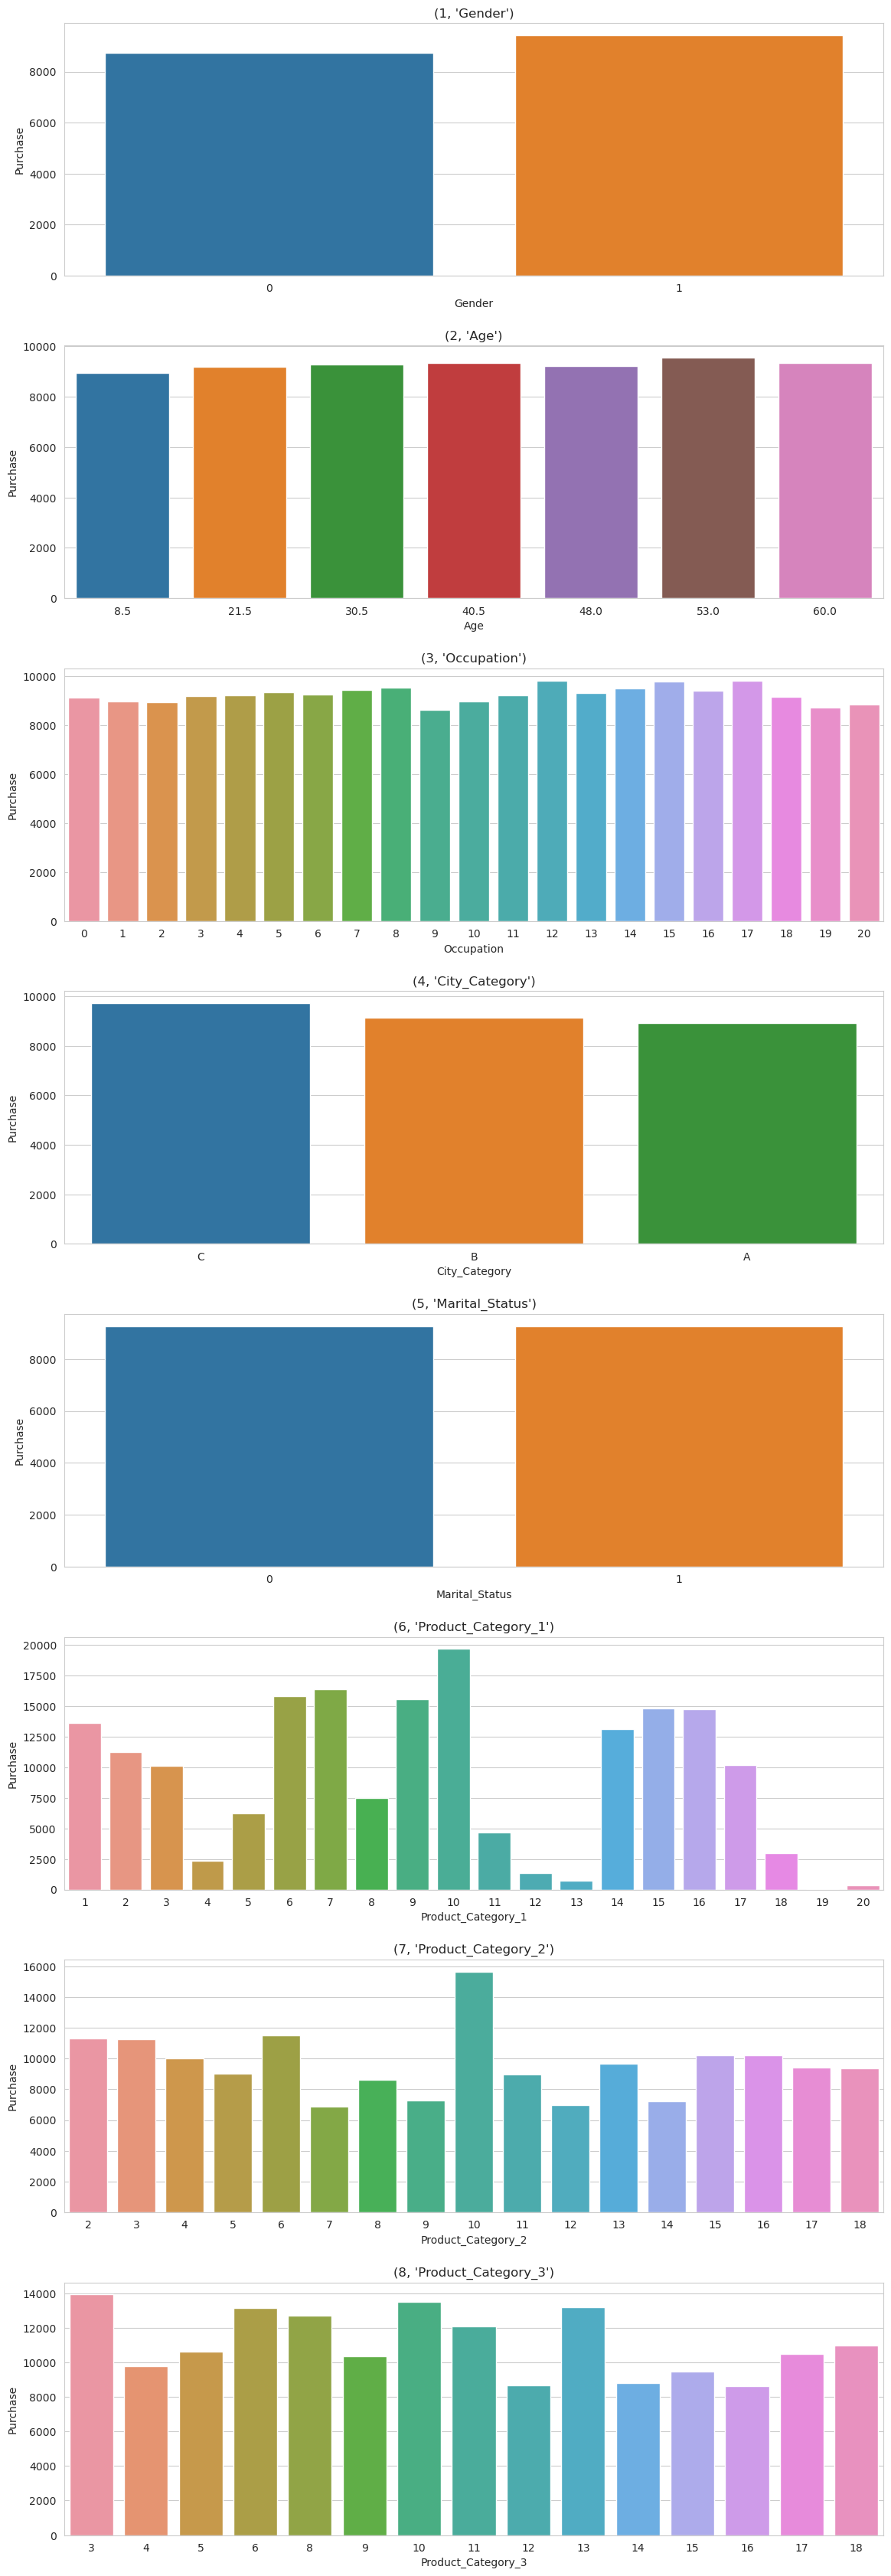

In [36]:
def plot_purchase(list1,ans,operation):
    
    fig,axes=plt.subplots(nrows=len(list1),ncols=1,figsize=(12,34))
    sns.set_style("whitegrid")
    for l,var in zip(enumerate(list1),ans):
        var = b_friday.groupby(l[1]).agg({'Purchase':operation}).sort_values(by='Purchase',ascending= False)
#         display(var)
        s = sns.barplot(ax=axes[l[0]],data=var,x=var.index,y='Purchase')
        s.set_title((l[0]+1,l[1]))
     
    plt.tight_layout(pad=2)
list1= ['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
ans= ['gen_g','age_g','occ_g','city_g','marital_g','cate1','cate2','cate3']

plot_purchase(list1,ans,'mean')

As per the above plot observation: (by taking Mean of Purchase)
1. 'Gender': Male customers purchase more 
2. 'Age': Age group 51-55 purchase more expensive product
3. 'Occupation': Occupation 12,15 and 17 purchase more
4. 'City_Category': City Category 'C' purchase amount are more than other two City
5. 'Marital_Status': Married & unmarried people both purchased amount are approx same
6. 'Product_Category_1': 10 is most purchased product category in Product_Category_1
7. 'Product_Category_2': 10 is most purchased product category in Product_Category_2
8. 'Product_Category_3': 3 is most purchased product category in Product_Category_3

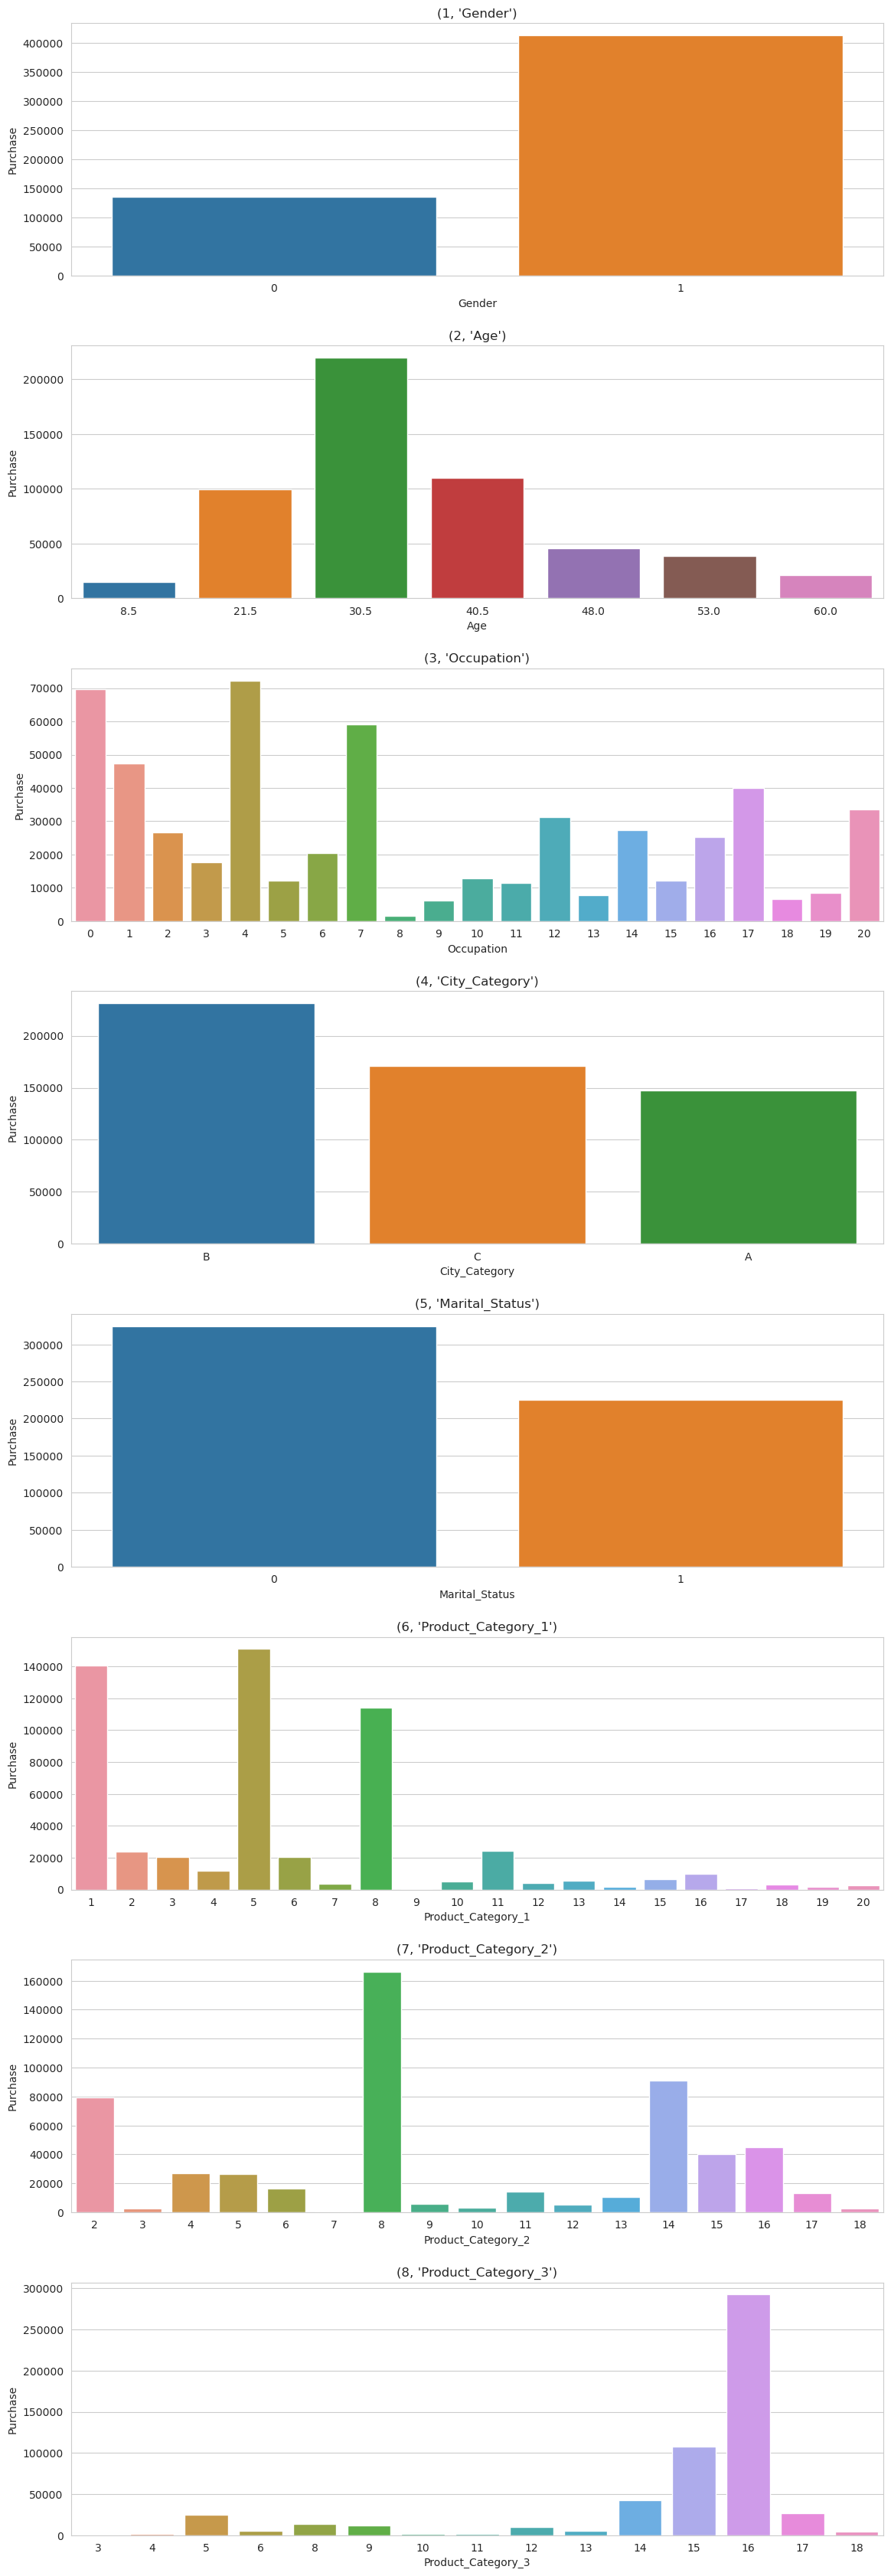

In [37]:
plot_purchase(list1,ans,'count')

As per the above plot observation (by taking count)
1. 'Gender': Male customers purchase more 
2. 'Age': Age group 26-35 purchase more
3. 'Occupation': Occupation 4 and 0 purchase more products
4. 'City_Category': City Category 'B' purchase more product than other two City
5. 'Marital_Status': Married people purchase more than unmarried
6. 'Product_Category_1': 5 is most purchased product category in Product_Category_1
7. 'Product_Category_2': 8 is most purchased product category in Product_Category_2
8. 'Product_Category_3': 16 is most purchased product category in Product_Category_3

#### Outliers

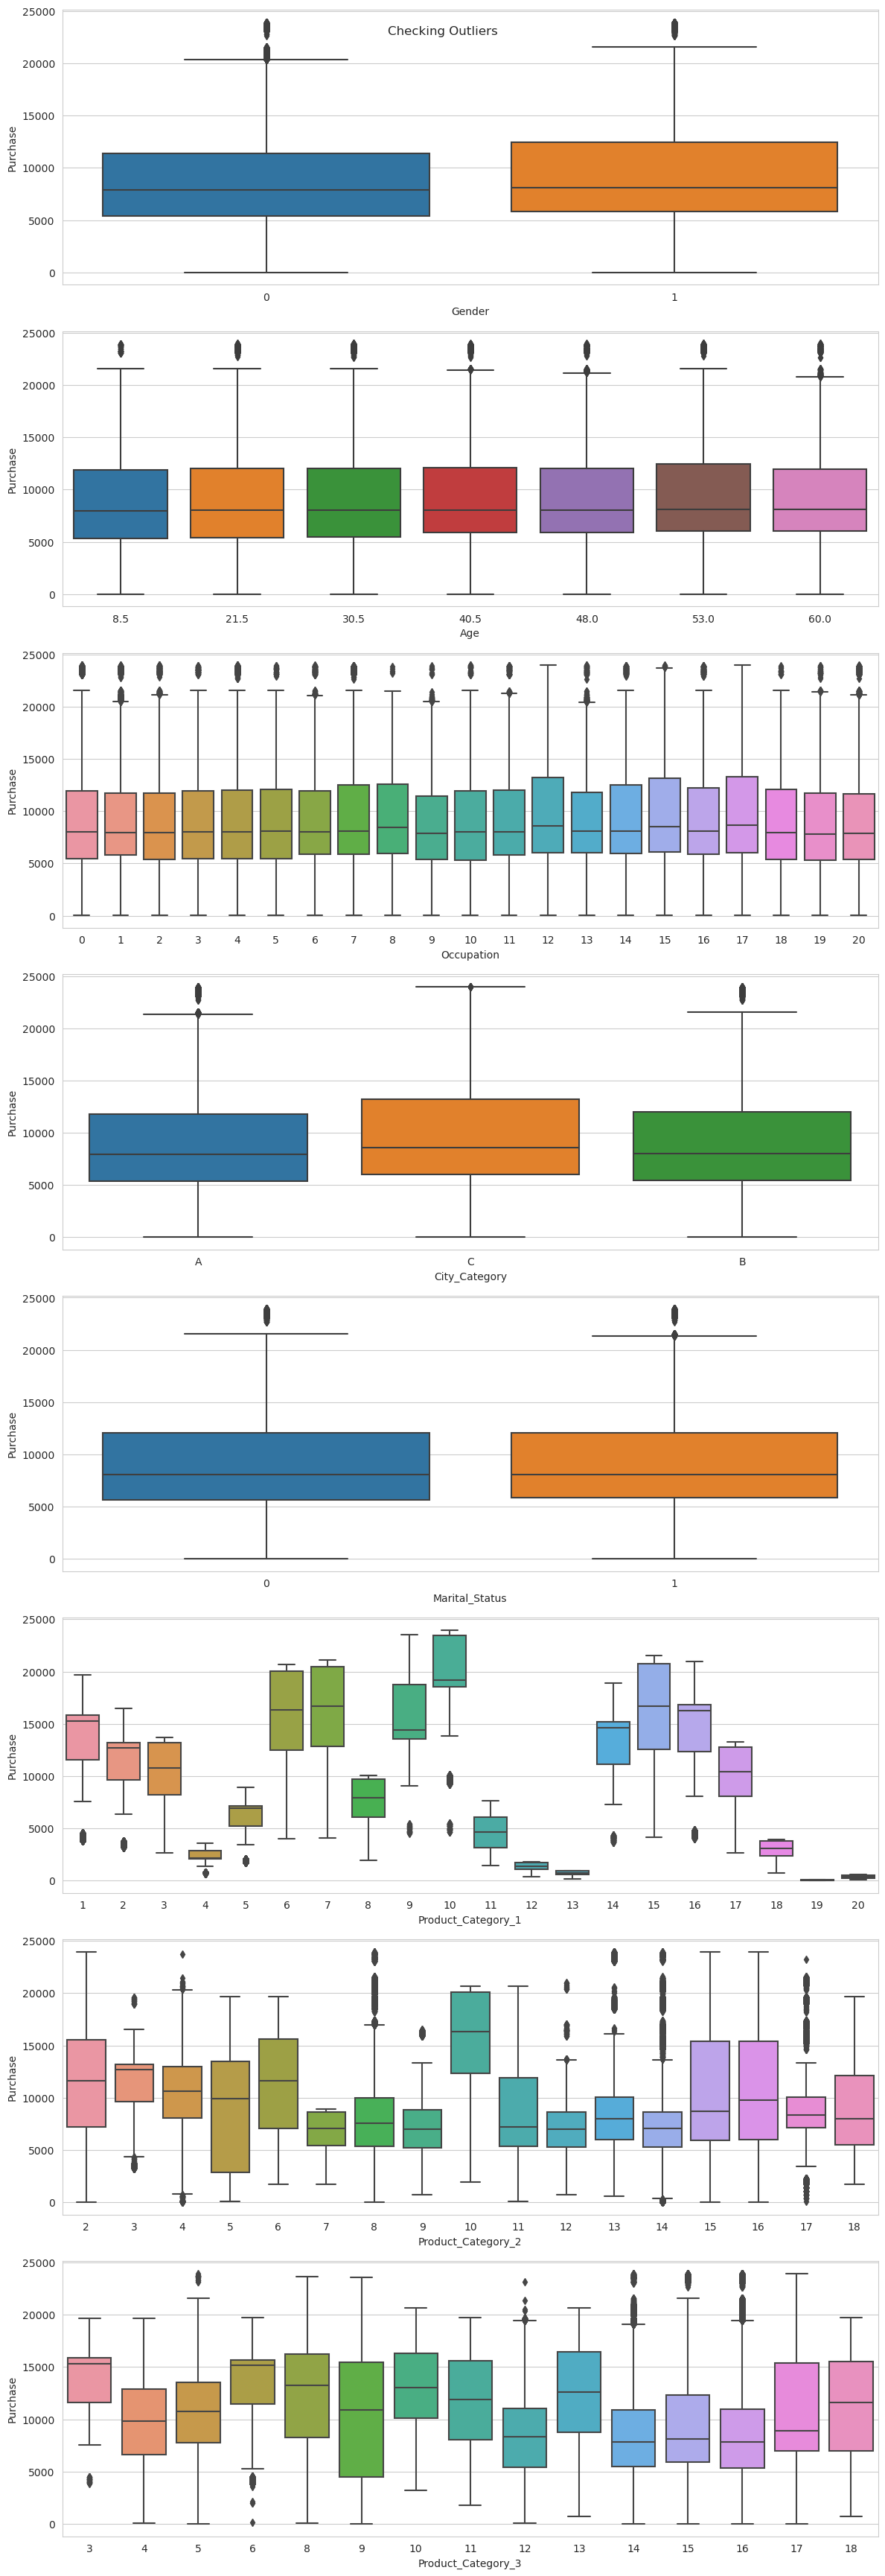

In [38]:
def outliers(list1):
    fig,axes = plt.subplots(nrows=len(list1), ncols=1, figsize=(12,35)) 
    fig.suptitle('Checking Outliers') 
    for i,j in enumerate(list1):
        sns.boxplot(ax=axes[i],data= b_friday,x = j,y='Purchase')
    plt.tight_layout()
        
list1= ['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

outliers(list1)

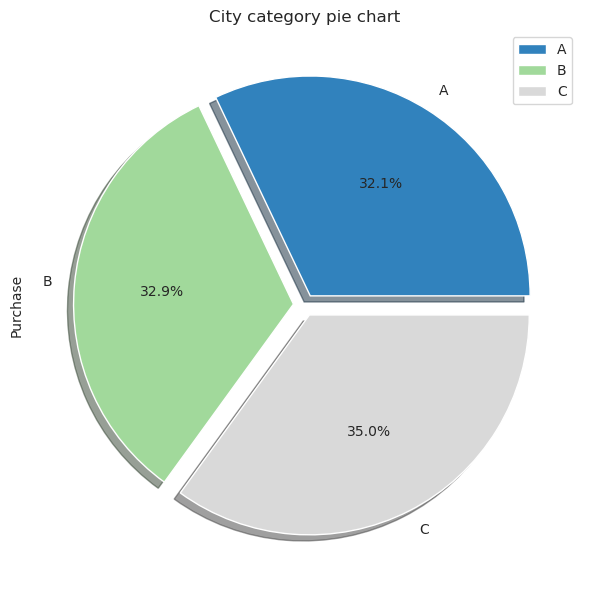

In [39]:
city= b_friday.groupby('City_Category').agg({'Purchase':'mean'})
city.plot(subplots=True,kind='pie',figsize=(6,6),cmap='tab20c', shadow=True, autopct='%.1f%%',explode = (0.05,0.05,0.05),)
plt.title('City category pie chart')
plt.tight_layout()

<Axes: xlabel='Occupation', ylabel='Purchase'>

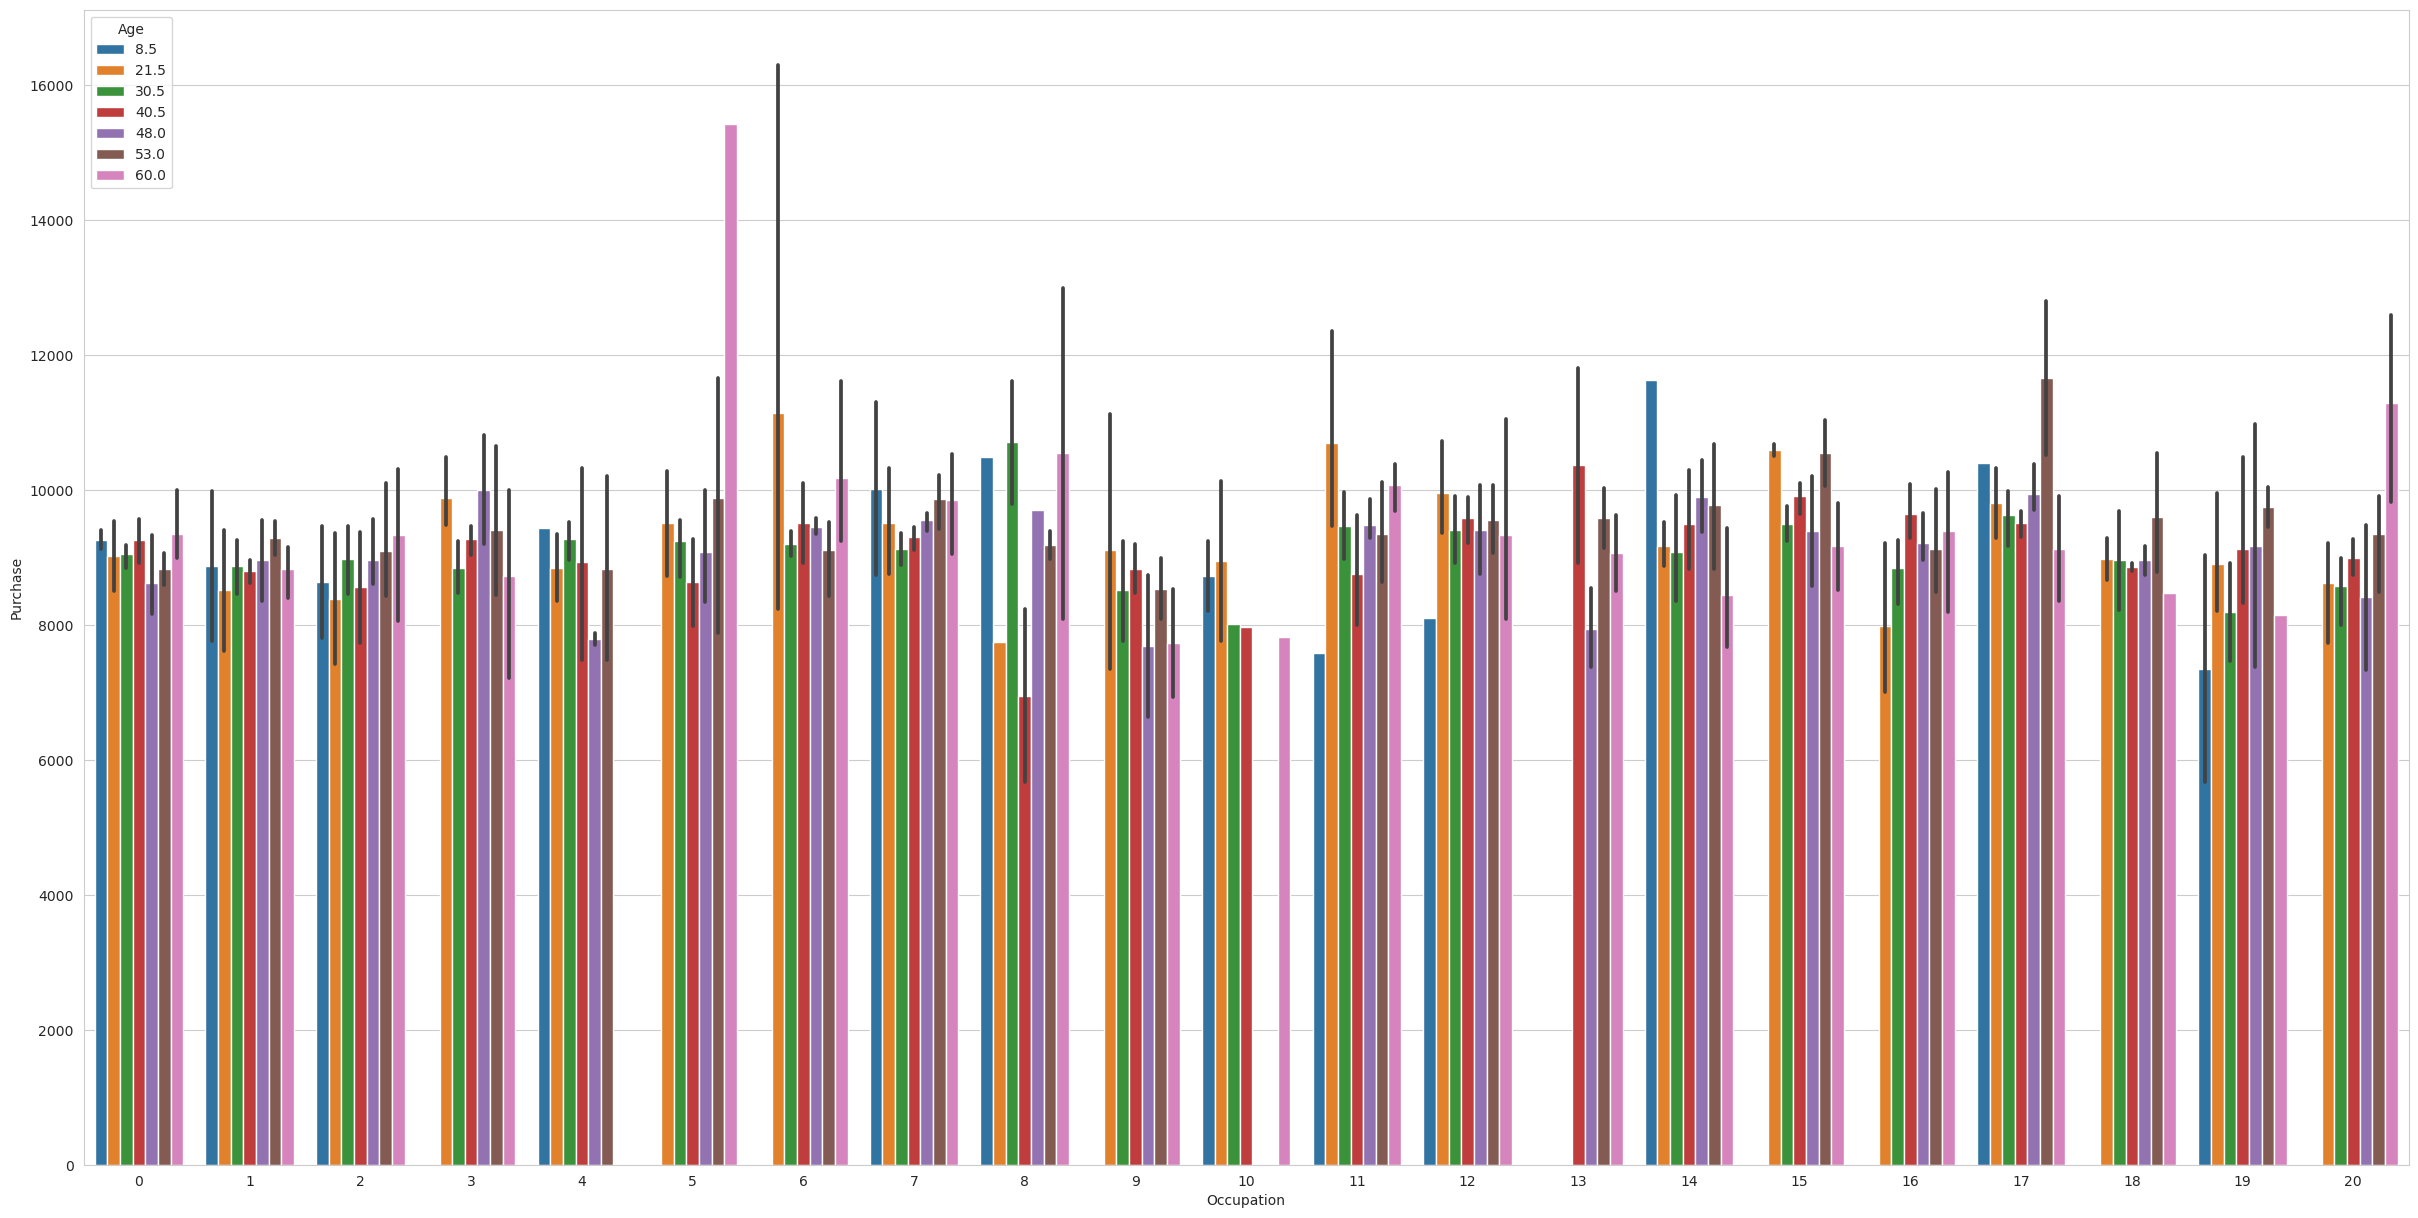

In [40]:
ds = b_friday.groupby(['Gender','Age','Marital_Status','Occupation']).agg({'Purchase':'mean'}).reset_index()
plt.figure(figsize=(30,15))
sns.set_style("whitegrid")
sns.barplot(data=ds,y='Purchase',x='Occupation',hue='Age')

Age with 55+ (60) and having occupation 5 purchase more 

<Axes: xlabel='Occupation', ylabel='Purchase'>

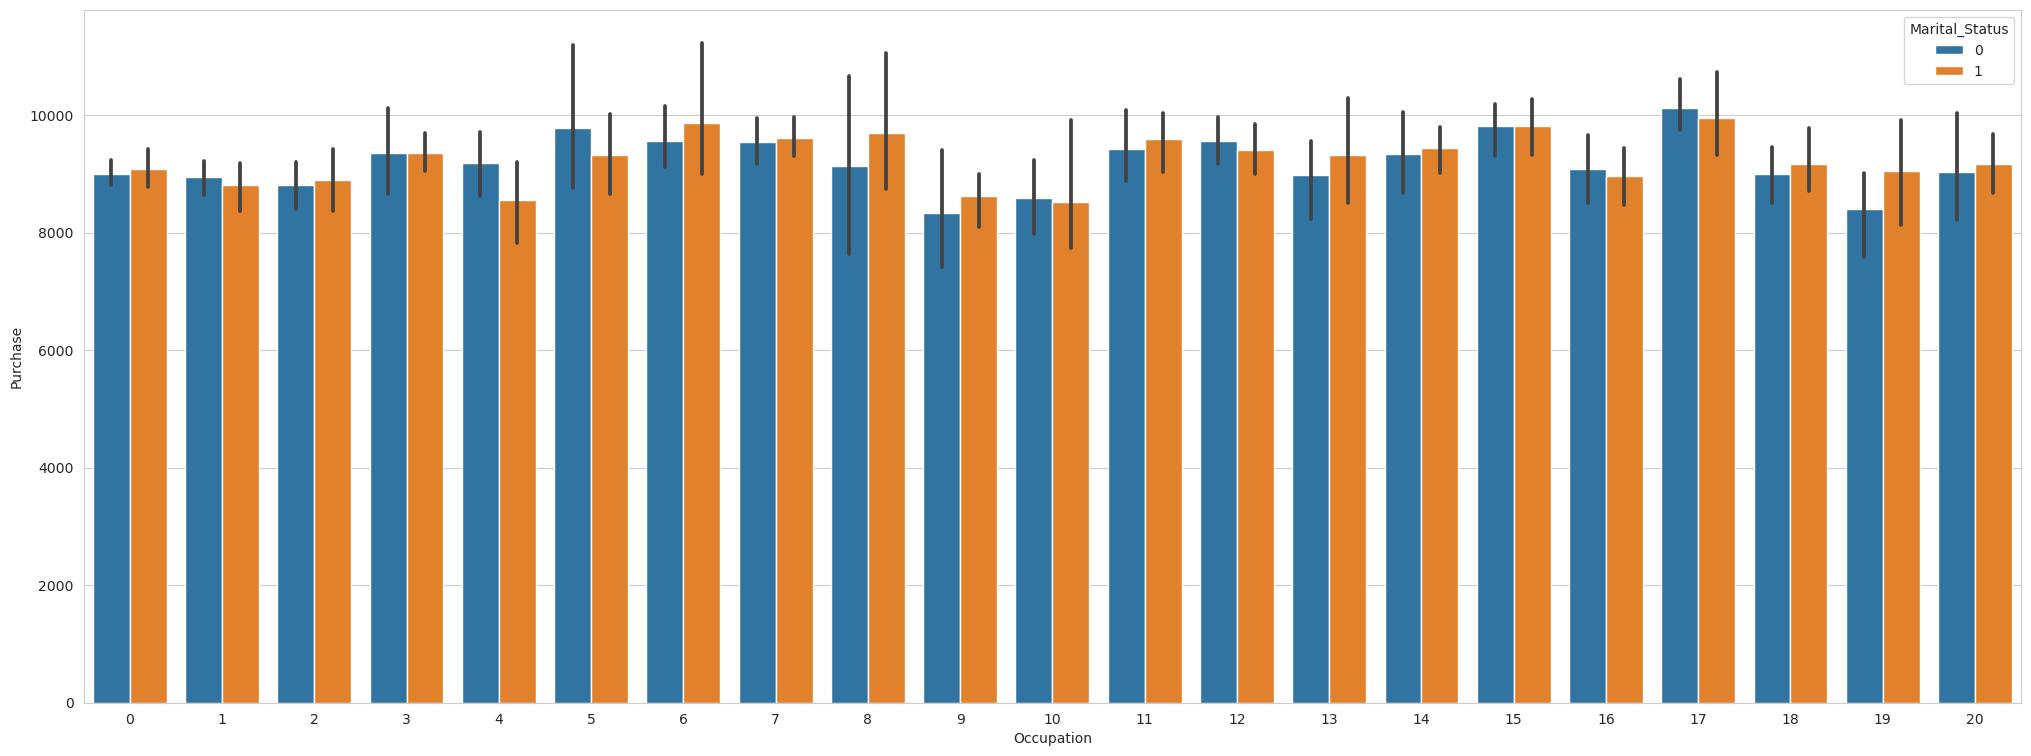

In [41]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.barplot(data=ds,y='Purchase',x='Occupation',hue='Marital_Status')

both married and unmarried people having approx equal puchase amount but occupation 17purchase more in both marital status

<Axes: xlabel='Occupation', ylabel='Purchase'>

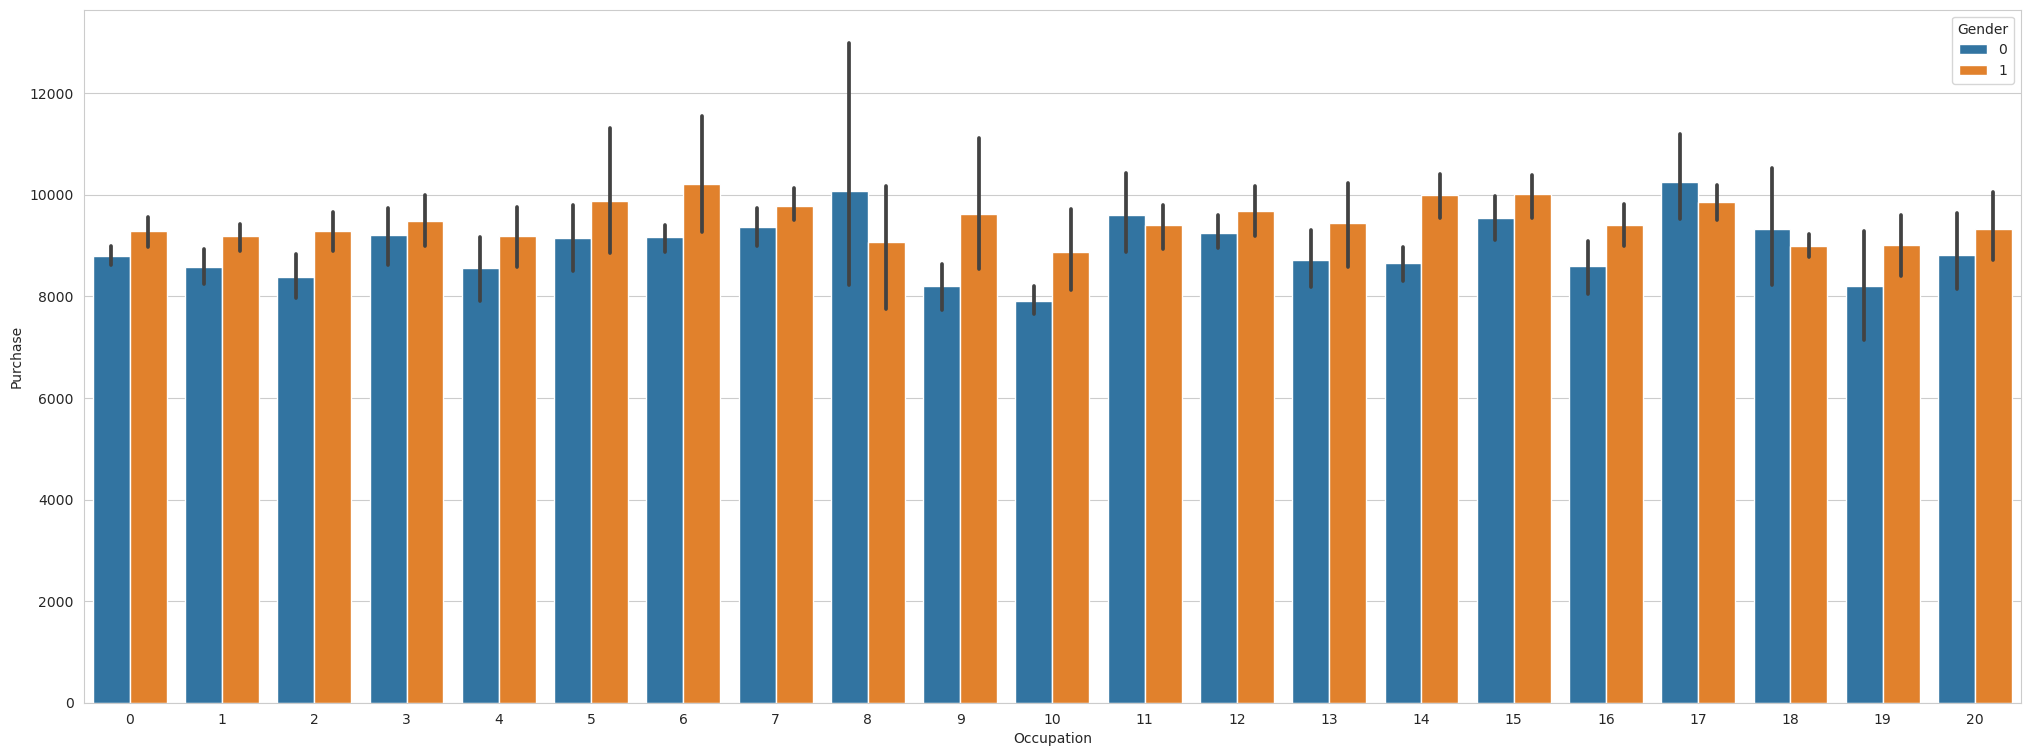

In [42]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.barplot(data=ds,y='Purchase',x='Occupation',hue='Gender')

Female having occupation 8 and Male with occupation 6 purchase more 

#### Max 5 and Min 5 Occurrance of Occupation v/s Product Categories

In [43]:
occ_h = b_friday['Occupation'].value_counts().head()
occ_l = b_friday['Occupation'].value_counts().tail()
occ_h,occ_l

(4     72272
 0     69615
 7     59115
 1     47426
 17    40031
 Name: Occupation, dtype: int64,
 19    8460
 13    7712
 18    6621
 9     6291
 8     1546
 Name: Occupation, dtype: int64)

In [44]:
cols_to_select = ['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']
s = b_friday.loc[b_friday['Occupation'].apply(lambda x: x in occ_h ),cols_to_select]
sl = b_friday.loc[b_friday['Occupation'].apply(lambda x: x in occ_l ),cols_to_select]

##### Max 5 occupation

<Axes: xlabel='Product_Category_1', ylabel='count'>

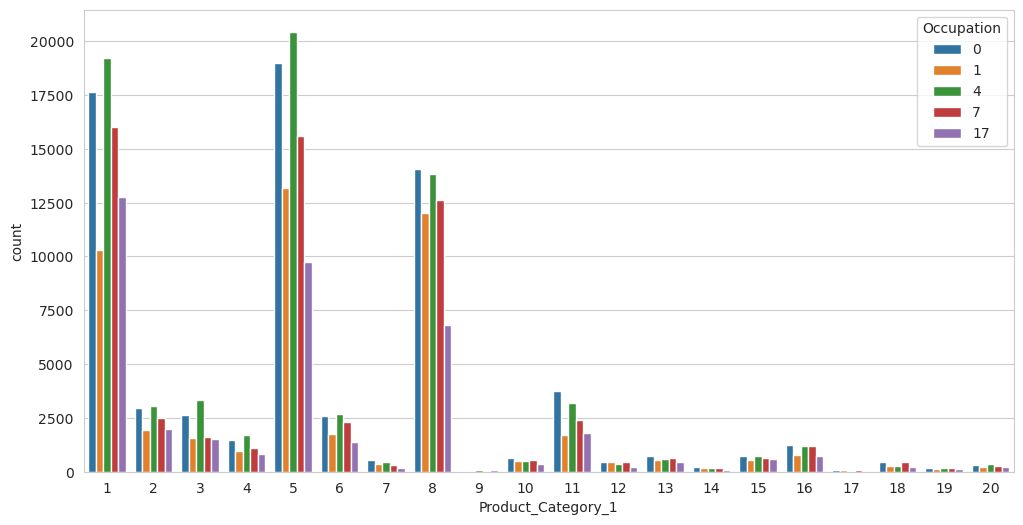

In [45]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(data=s,x='Product_Category_1',hue='Occupation')

Occupation 4 mostly purchase product_category 5

<Axes: xlabel='Product_Category_2', ylabel='count'>

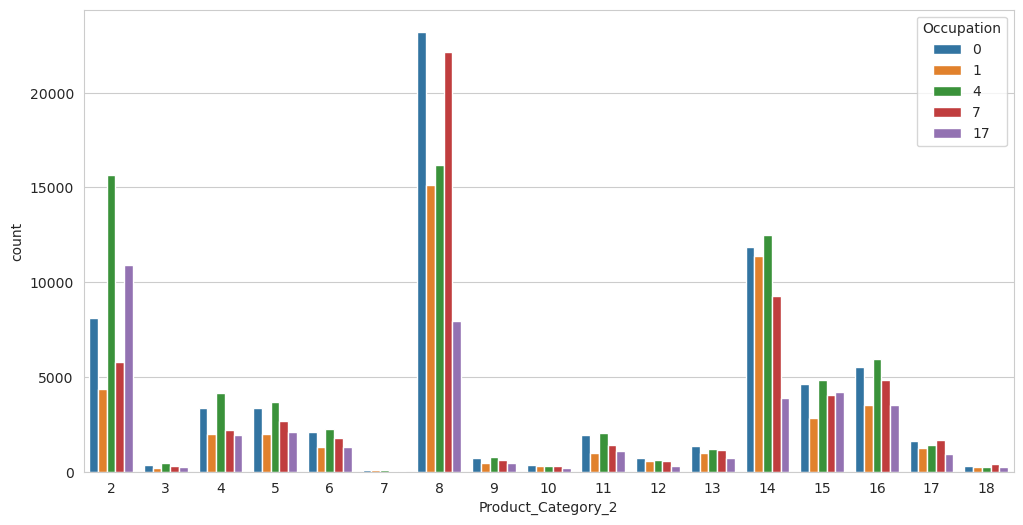

In [46]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(data=s,x='Product_Category_2',hue='Occupation')

In Product_Category_2 occupation 0 purchase more product of category 8 

<Axes: xlabel='Product_Category_3', ylabel='count'>

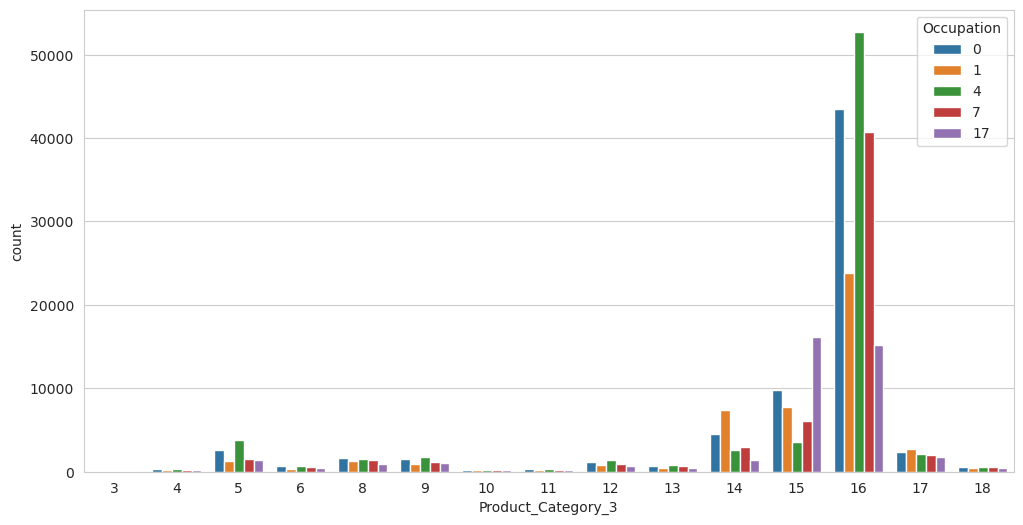

In [47]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(data=s,x='Product_Category_3',hue='Occupation')

In Product_Category_3 occupation 4 purchase more product of category 16

##### Min 5 Occupation

<Axes: xlabel='Product_Category_1', ylabel='count'>

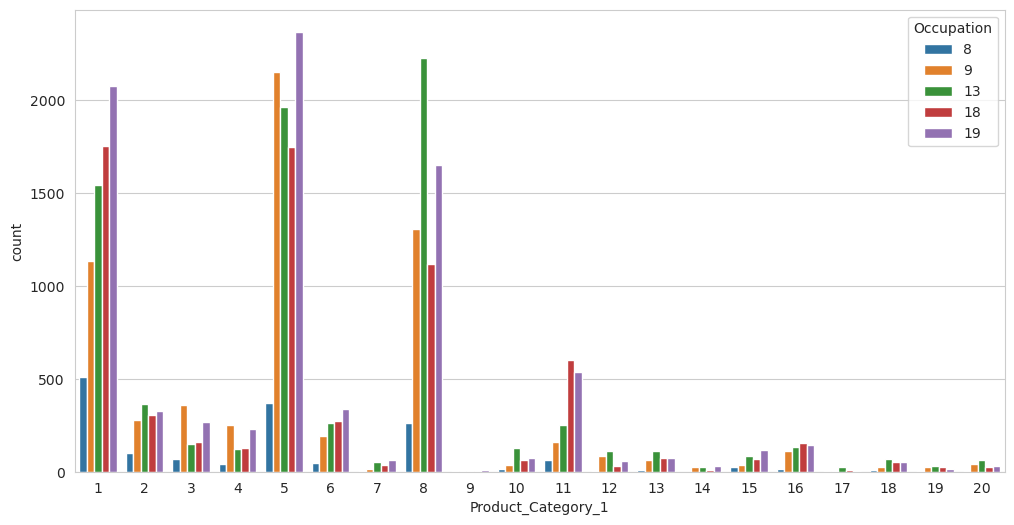

In [48]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(data=sl,x='Product_Category_1',hue='Occupation')

In Product_Category_1 occupation 19 purchase more product of category 5 

<Axes: xlabel='Product_Category_2', ylabel='count'>

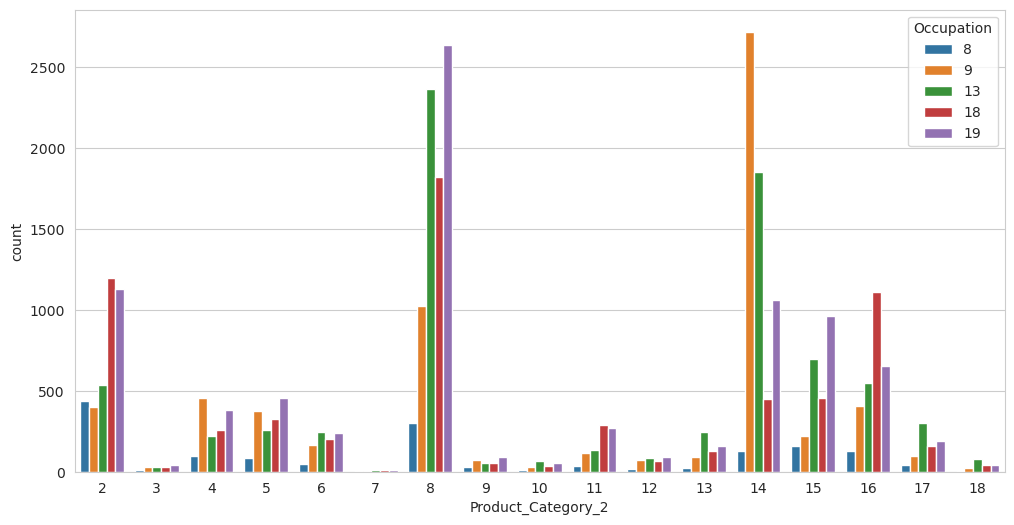

In [49]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(data=sl,x='Product_Category_2',hue='Occupation')

In Product_Category_2 occupation 9 purchase more product of category 14

<Axes: xlabel='Product_Category_3', ylabel='count'>

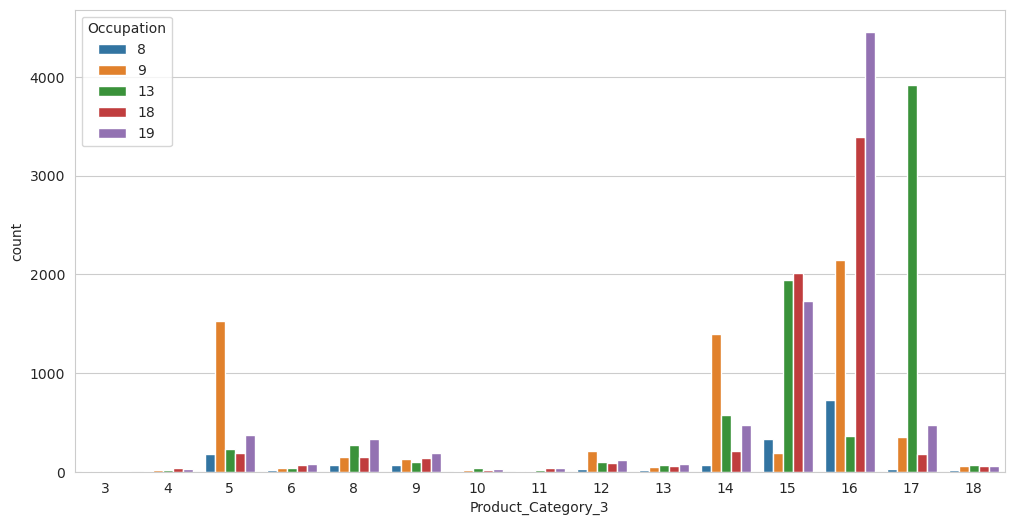

In [50]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.countplot(data=sl,x='Product_Category_3',hue='Occupation')

In Product_Category_3 occupation 19 purchase more product of category 16 

#### Product Categories v/s Other

<Axes: xlabel='Product_Category_1', ylabel='count'>

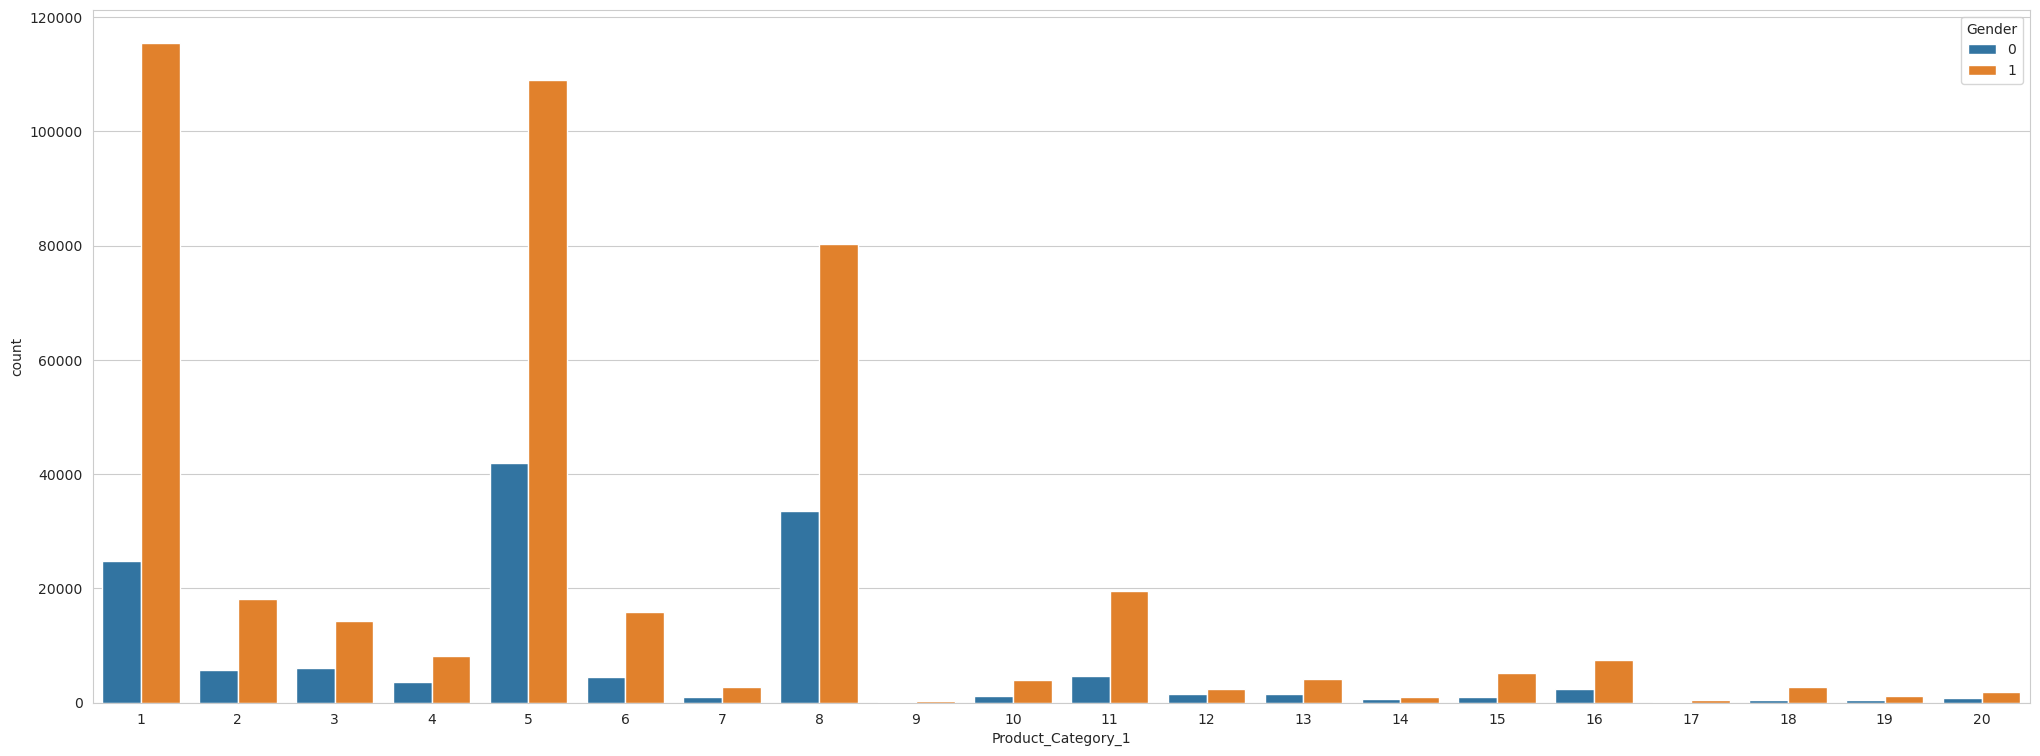

In [51]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_1',hue='Gender')

Male customer purchase more product of category 1 and female purchase product category 5

<Axes: xlabel='Product_Category_2', ylabel='count'>

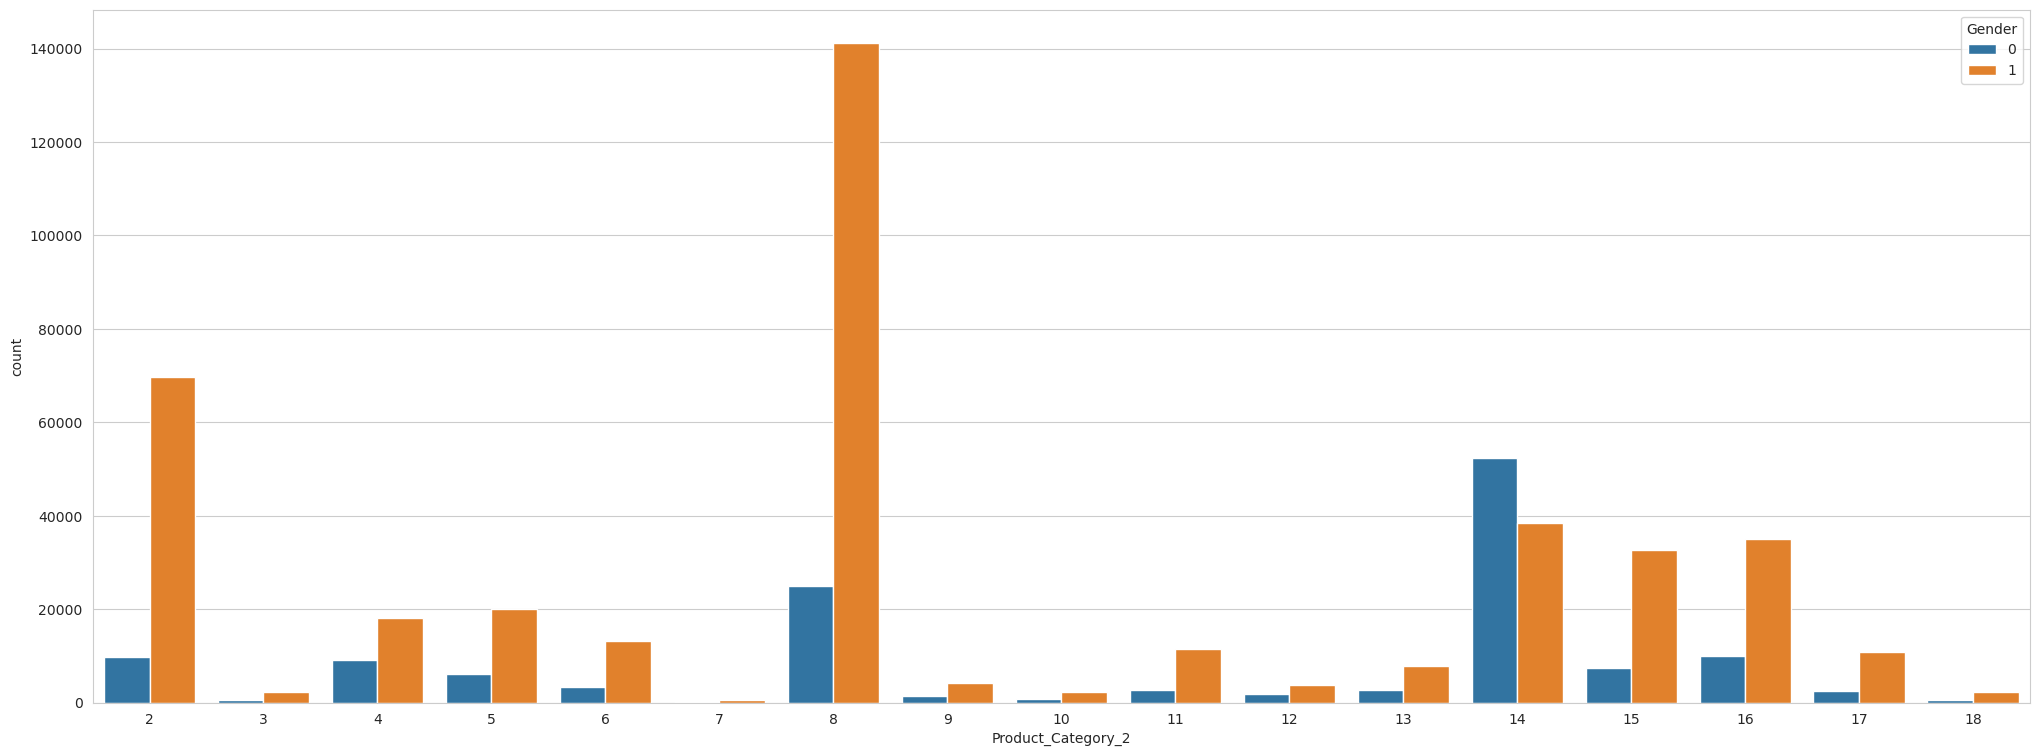

In [52]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_2',hue='Gender')

Male customer purchase more product of category 8 and female purchase product category 14

<Axes: xlabel='Product_Category_3', ylabel='count'>

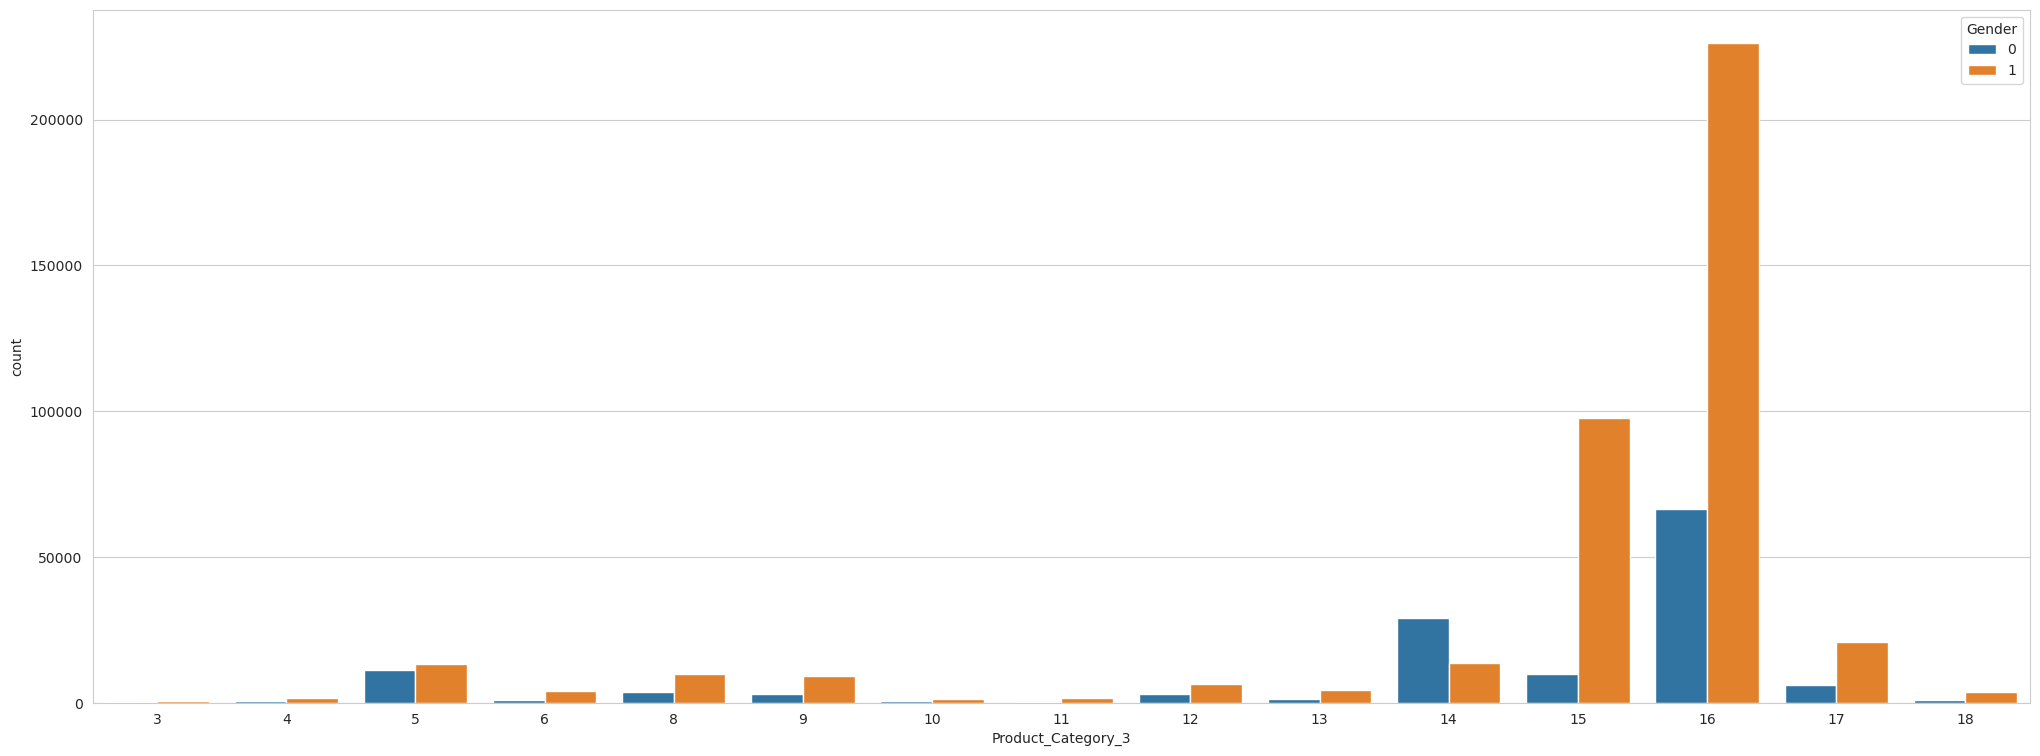

In [53]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_3',hue='Gender')

both purchase product category 16

<Axes: xlabel='Product_Category_1', ylabel='count'>

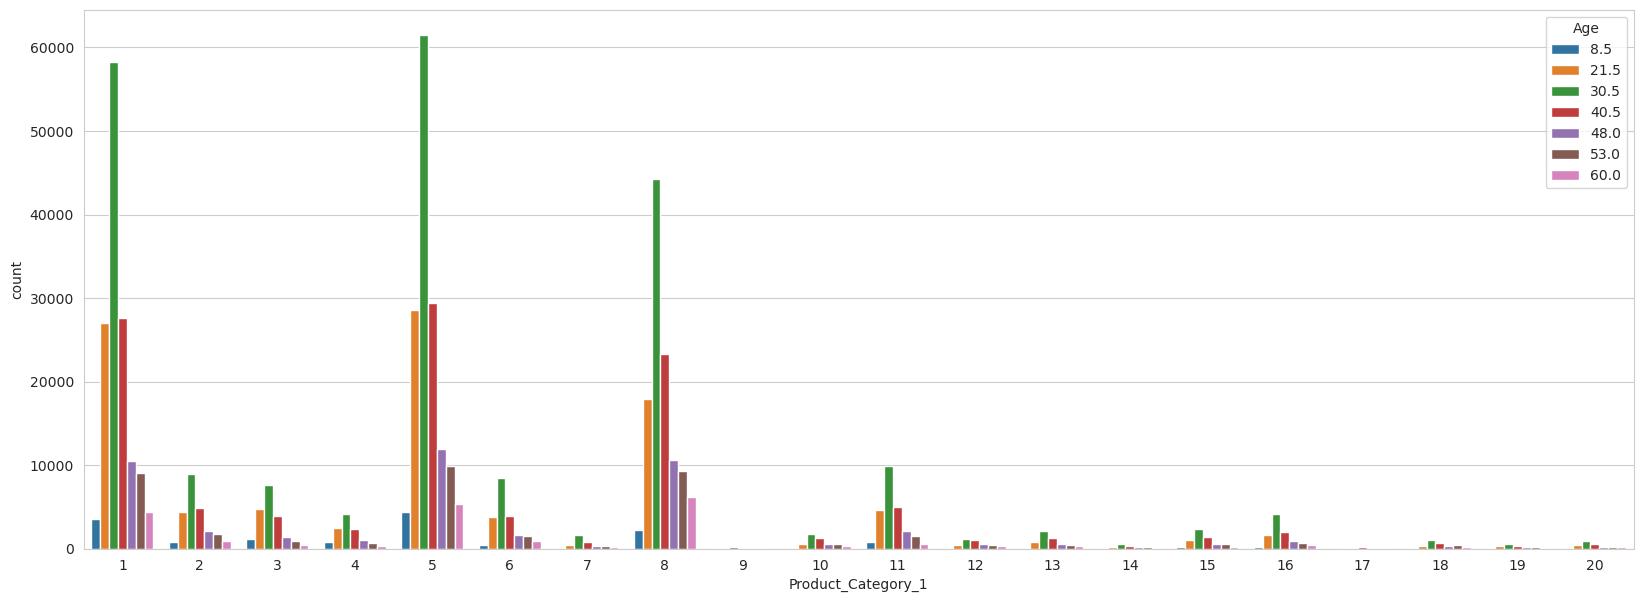

In [54]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_1',hue='Age')

Age group 26-35 (30.5) purchase more product category 5

<Axes: xlabel='Product_Category_2', ylabel='count'>

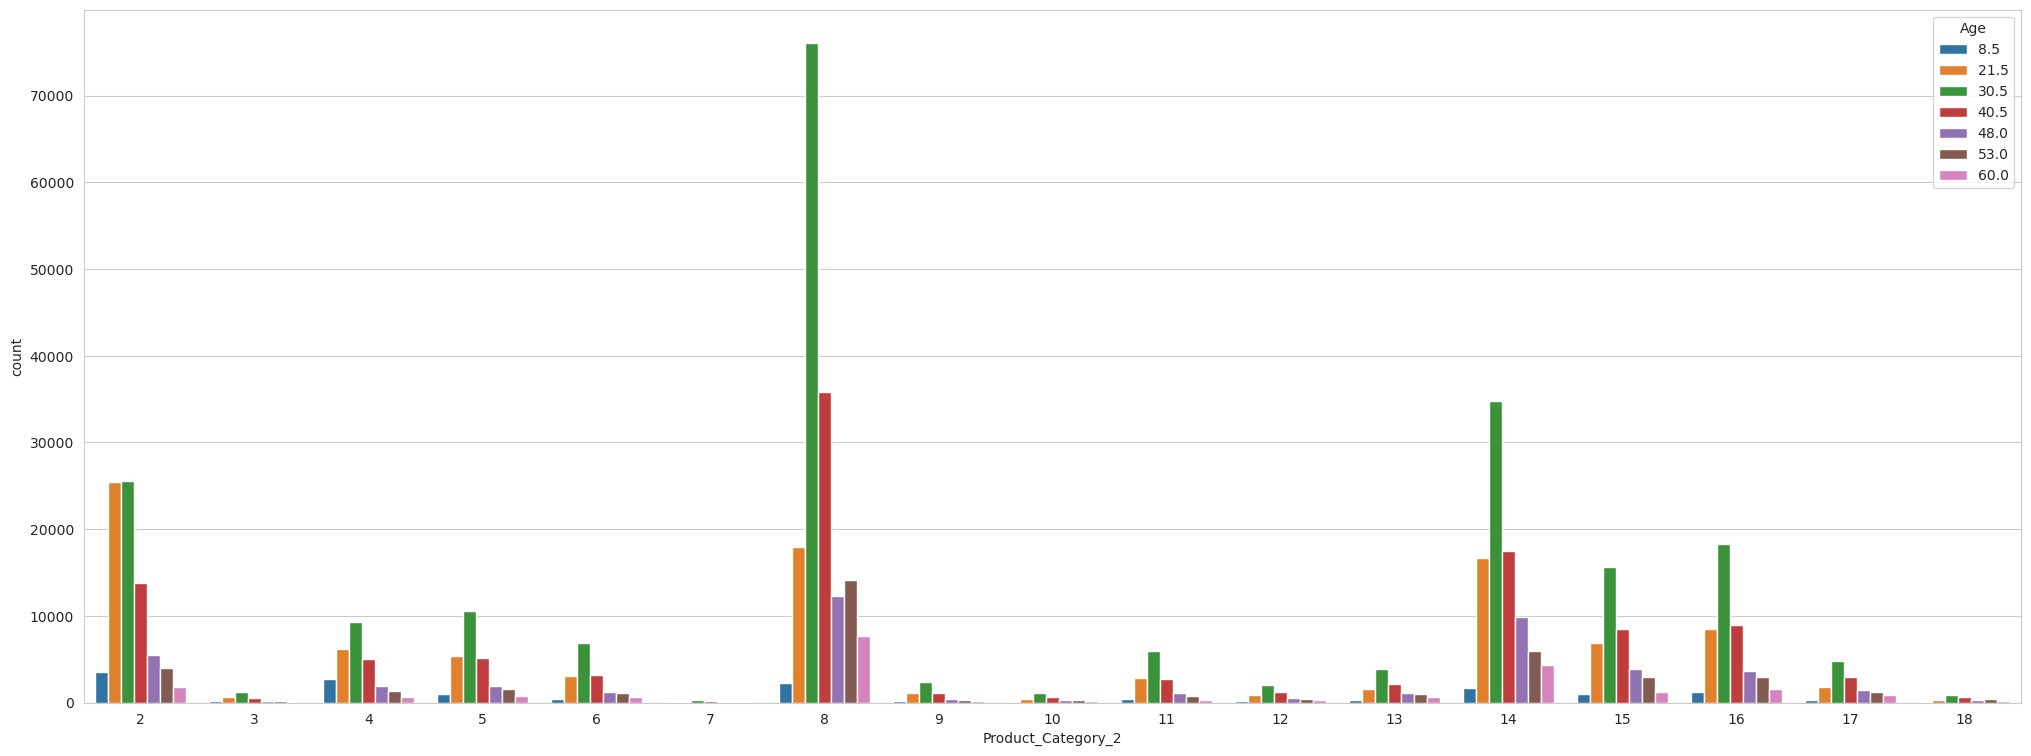

In [55]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_2',hue='Age')

Age group 26-35 (30.5) purchase more product category 8

<Axes: xlabel='Product_Category_3', ylabel='count'>

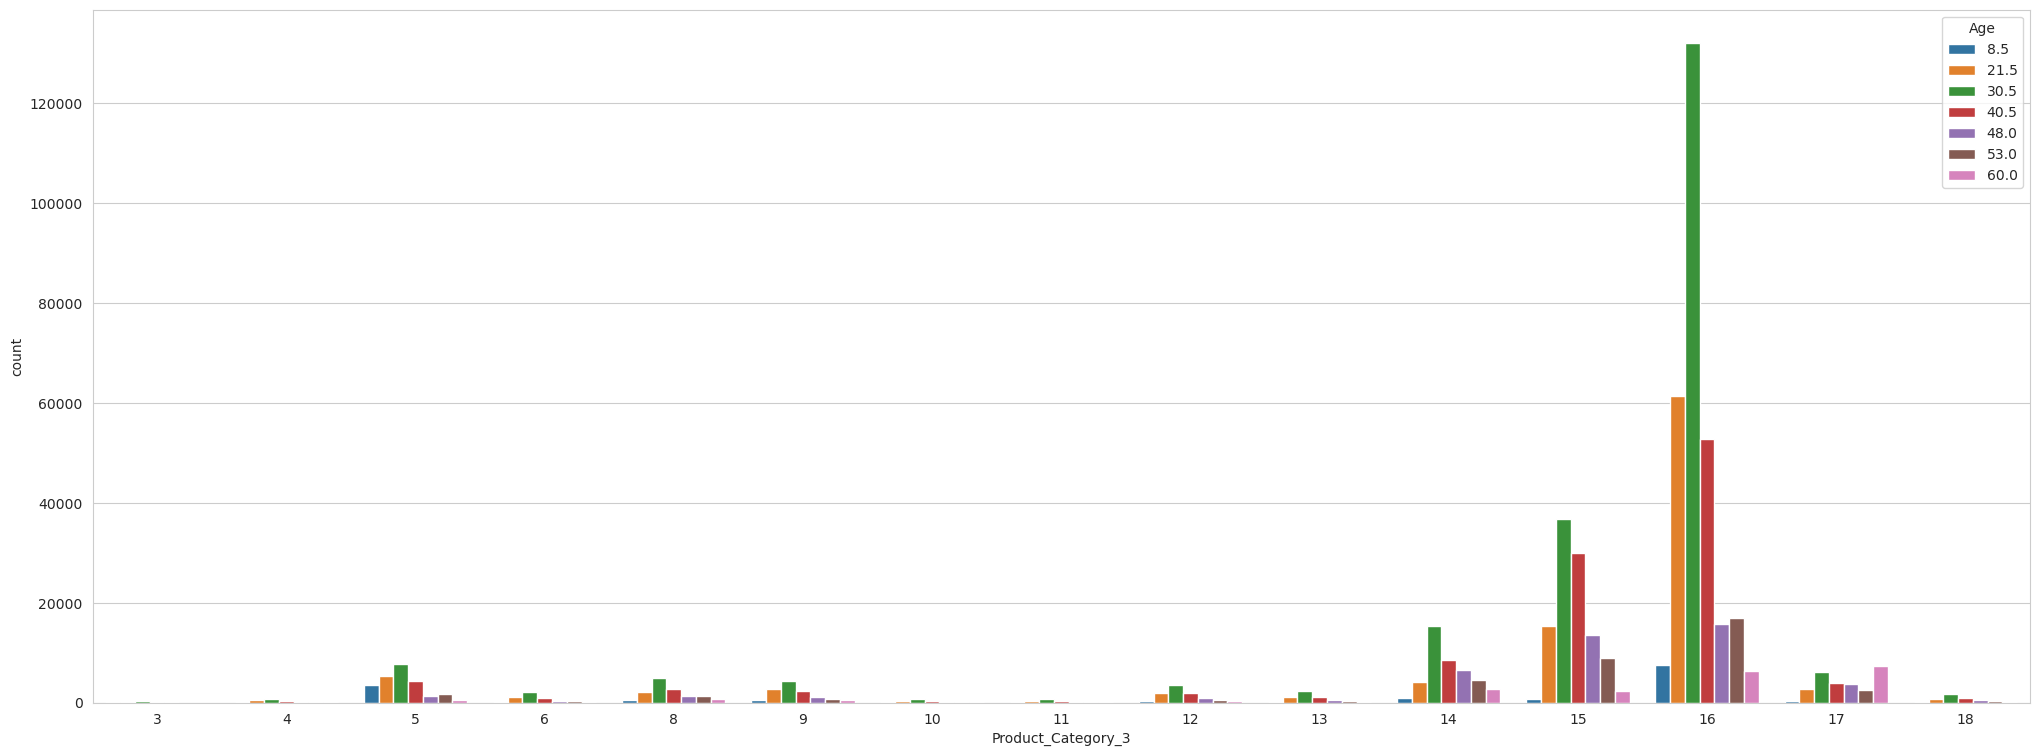

In [56]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_3',hue='Age')

Age group 26-35 (30.5) purchase more product category 16

<Axes: xlabel='Product_Category_1', ylabel='count'>

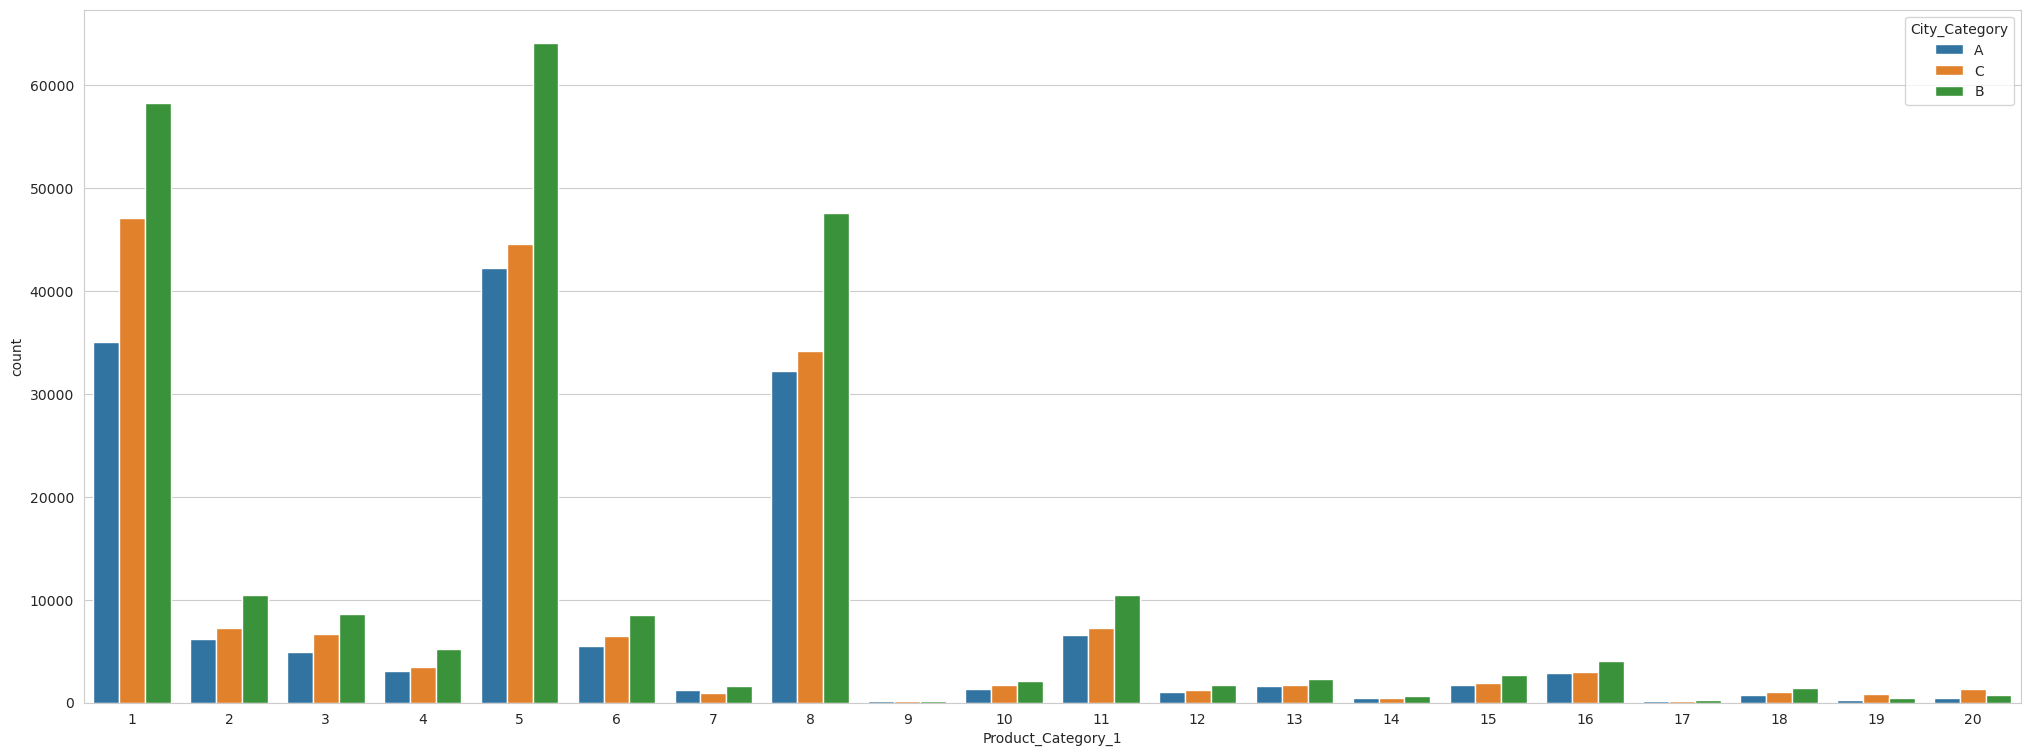

In [57]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_1',hue='City_Category')

City B purchase more product of 5

<Axes: xlabel='Product_Category_2', ylabel='count'>

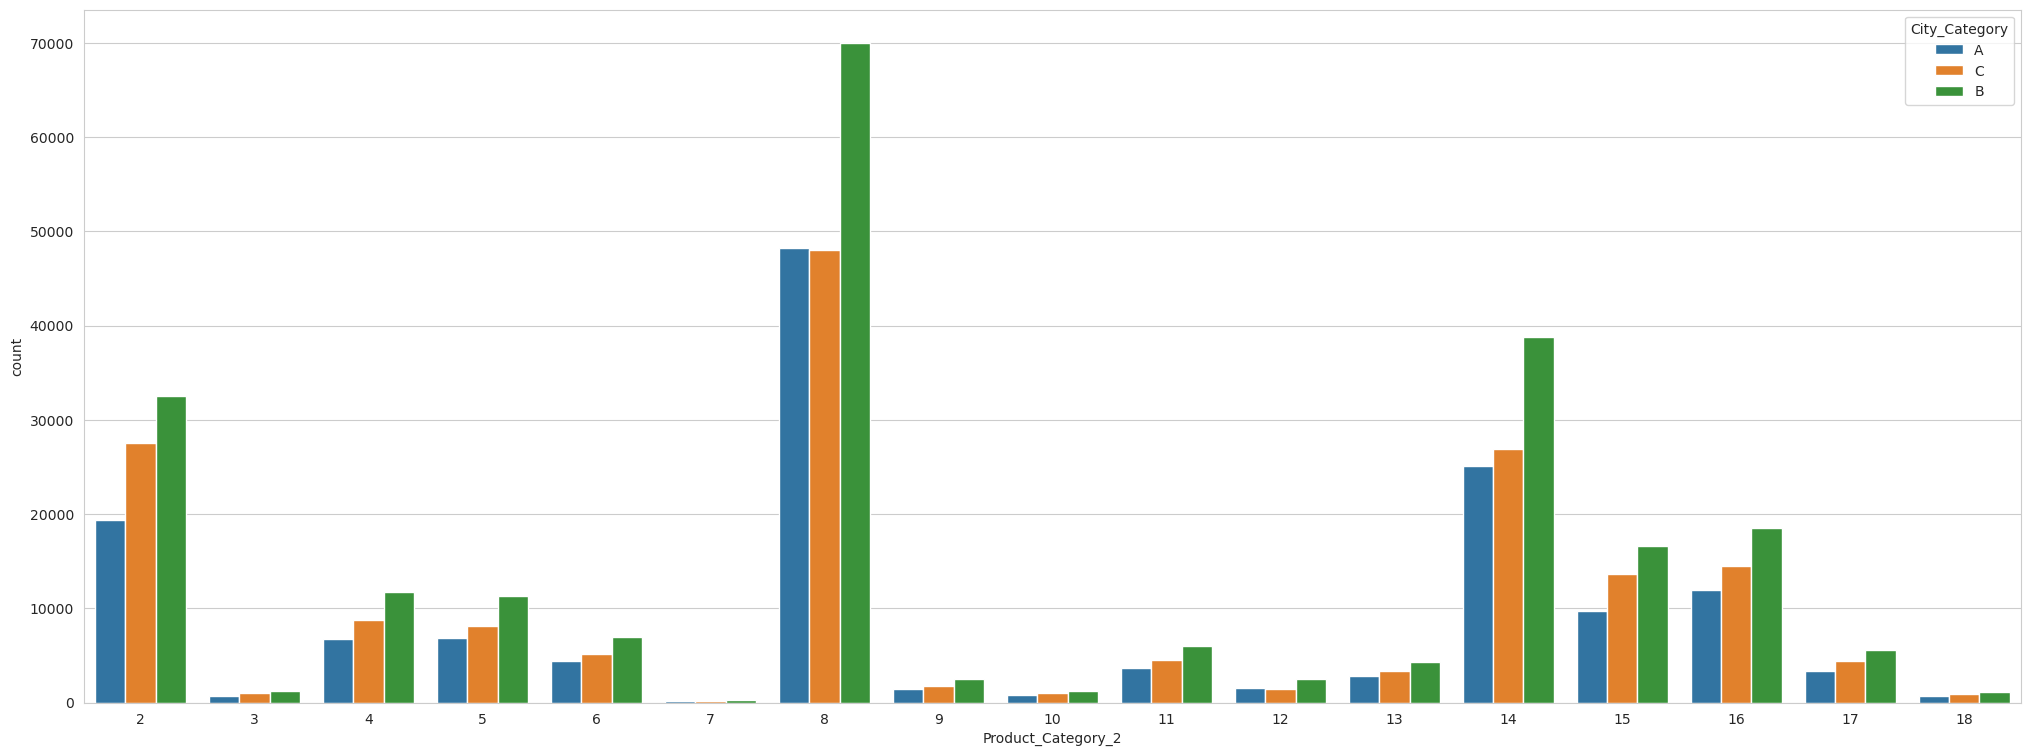

In [58]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_2',hue='City_Category')

City B purchase more product of 8

<Axes: xlabel='Product_Category_3', ylabel='count'>

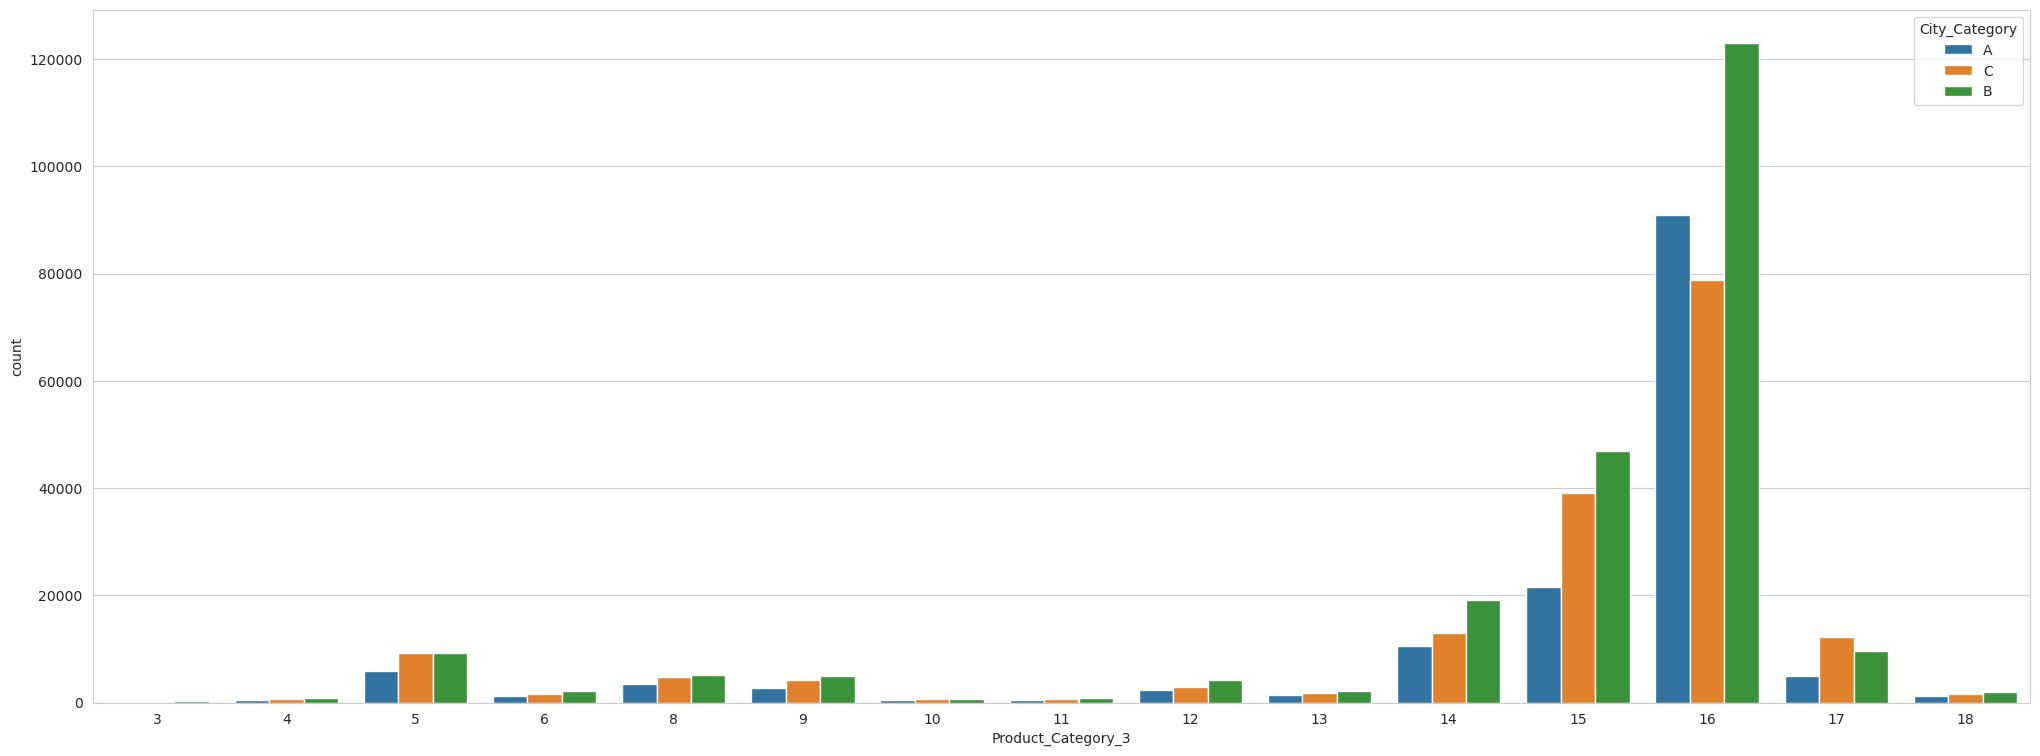

In [59]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_3',hue='City_Category')

City B purchase more product of 16

<Axes: xlabel='Product_Category_1', ylabel='count'>

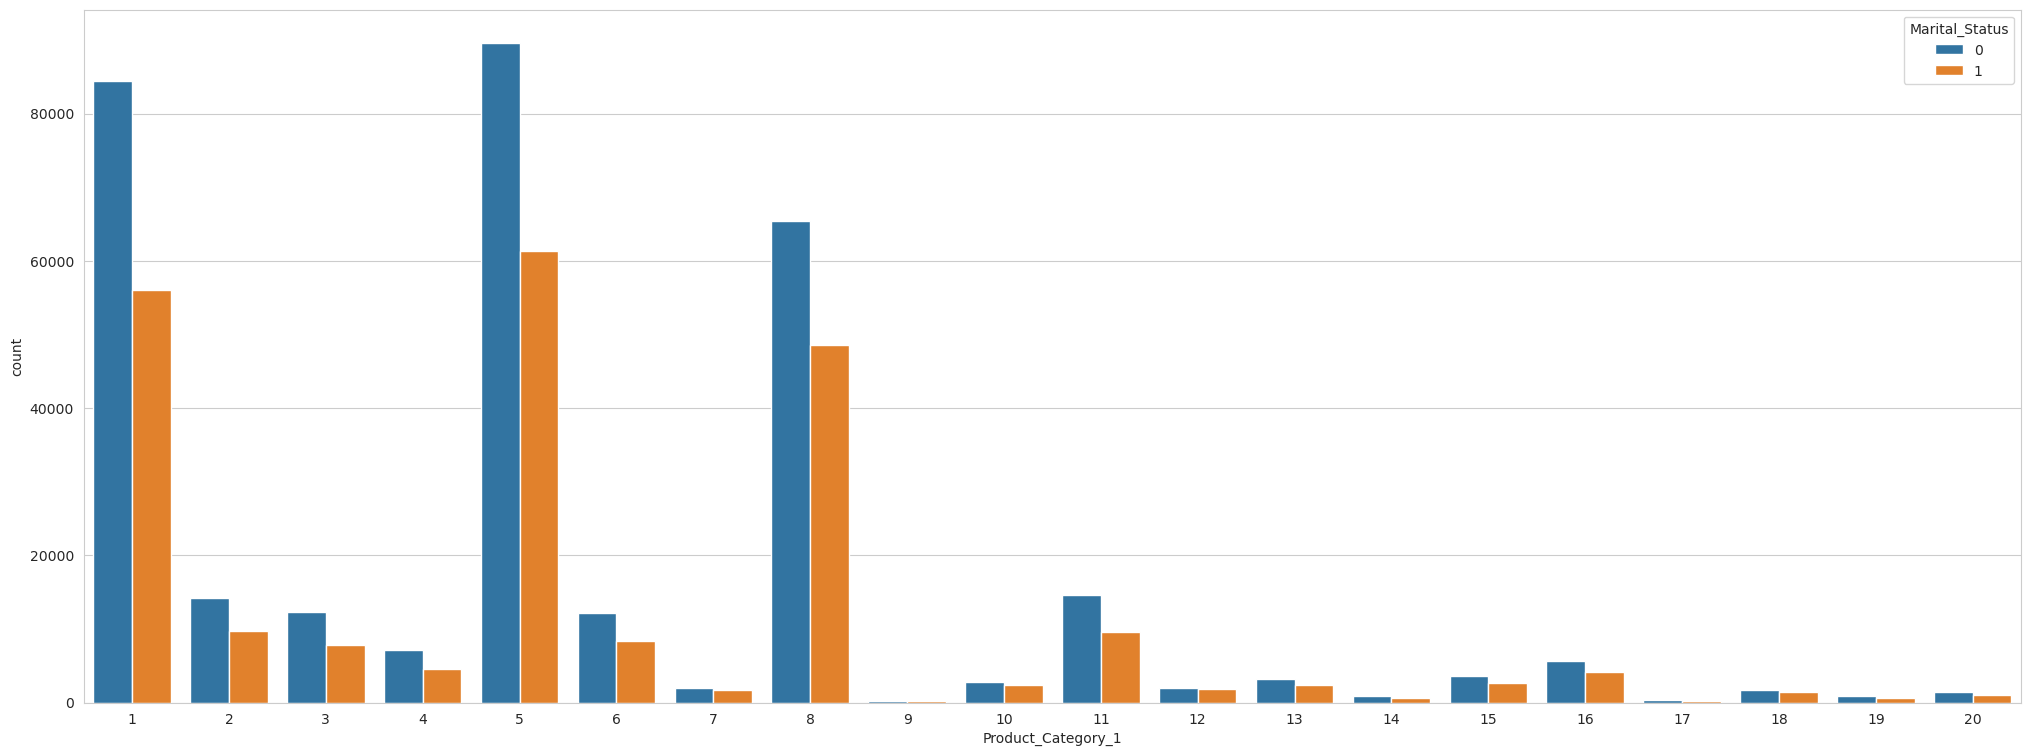

In [60]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_1',hue='Marital_Status')

Both Married and unmarried people purchase more product of 5

<Axes: xlabel='Product_Category_2', ylabel='count'>

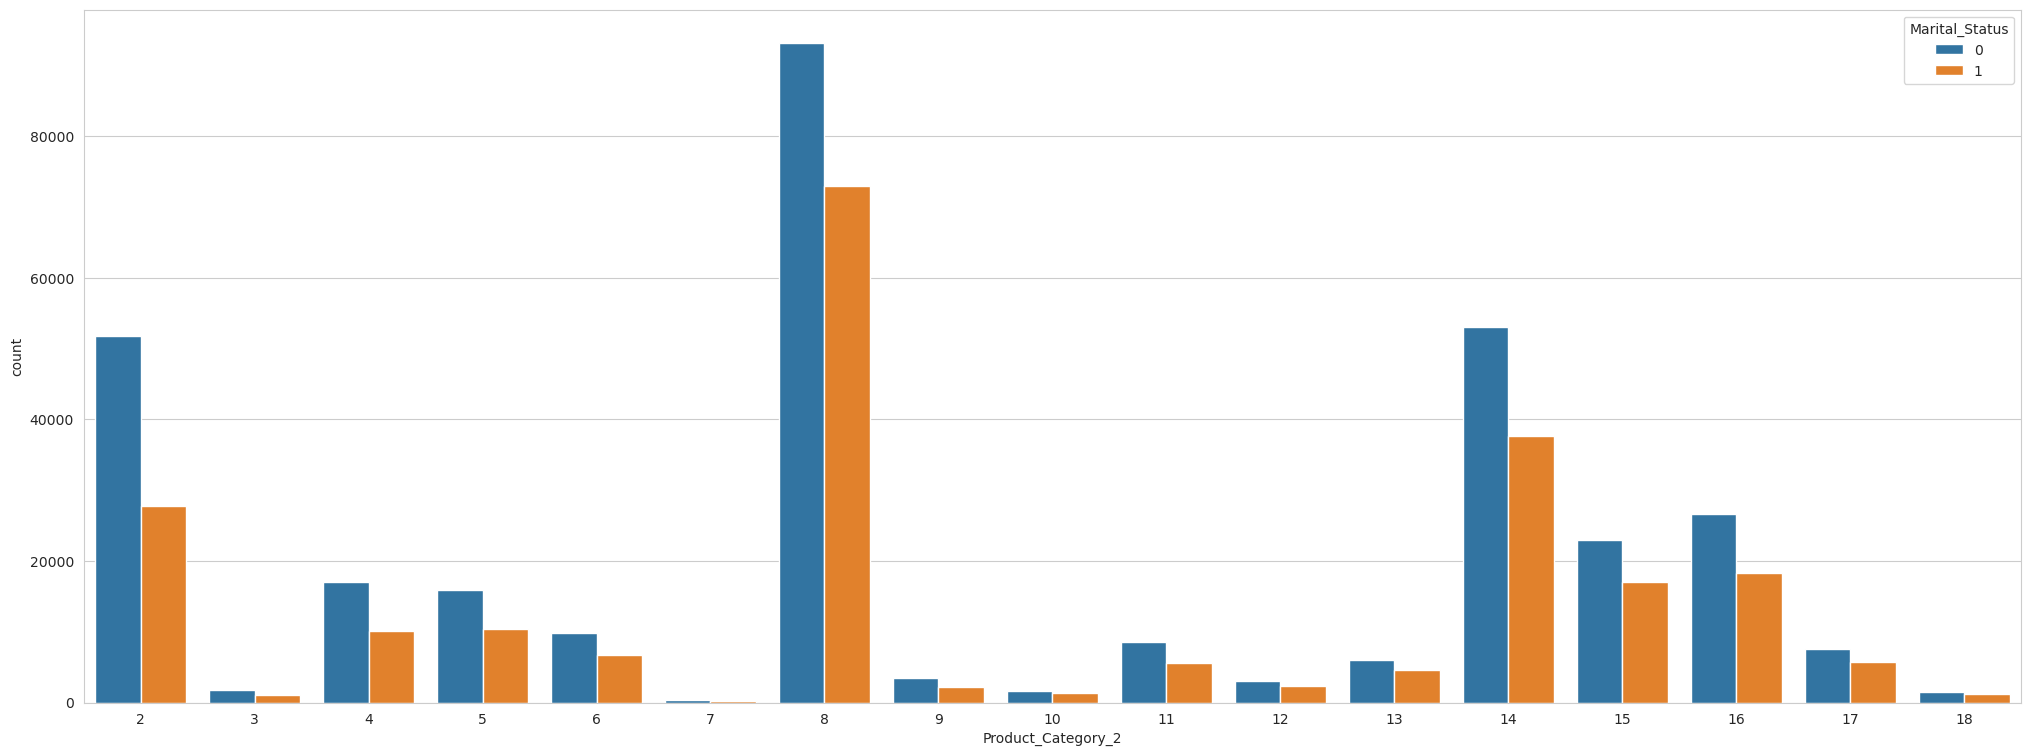

In [61]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_2',hue='Marital_Status')

Both Married and unmarried people purchase more product of 8

<Axes: xlabel='Product_Category_3', ylabel='count'>

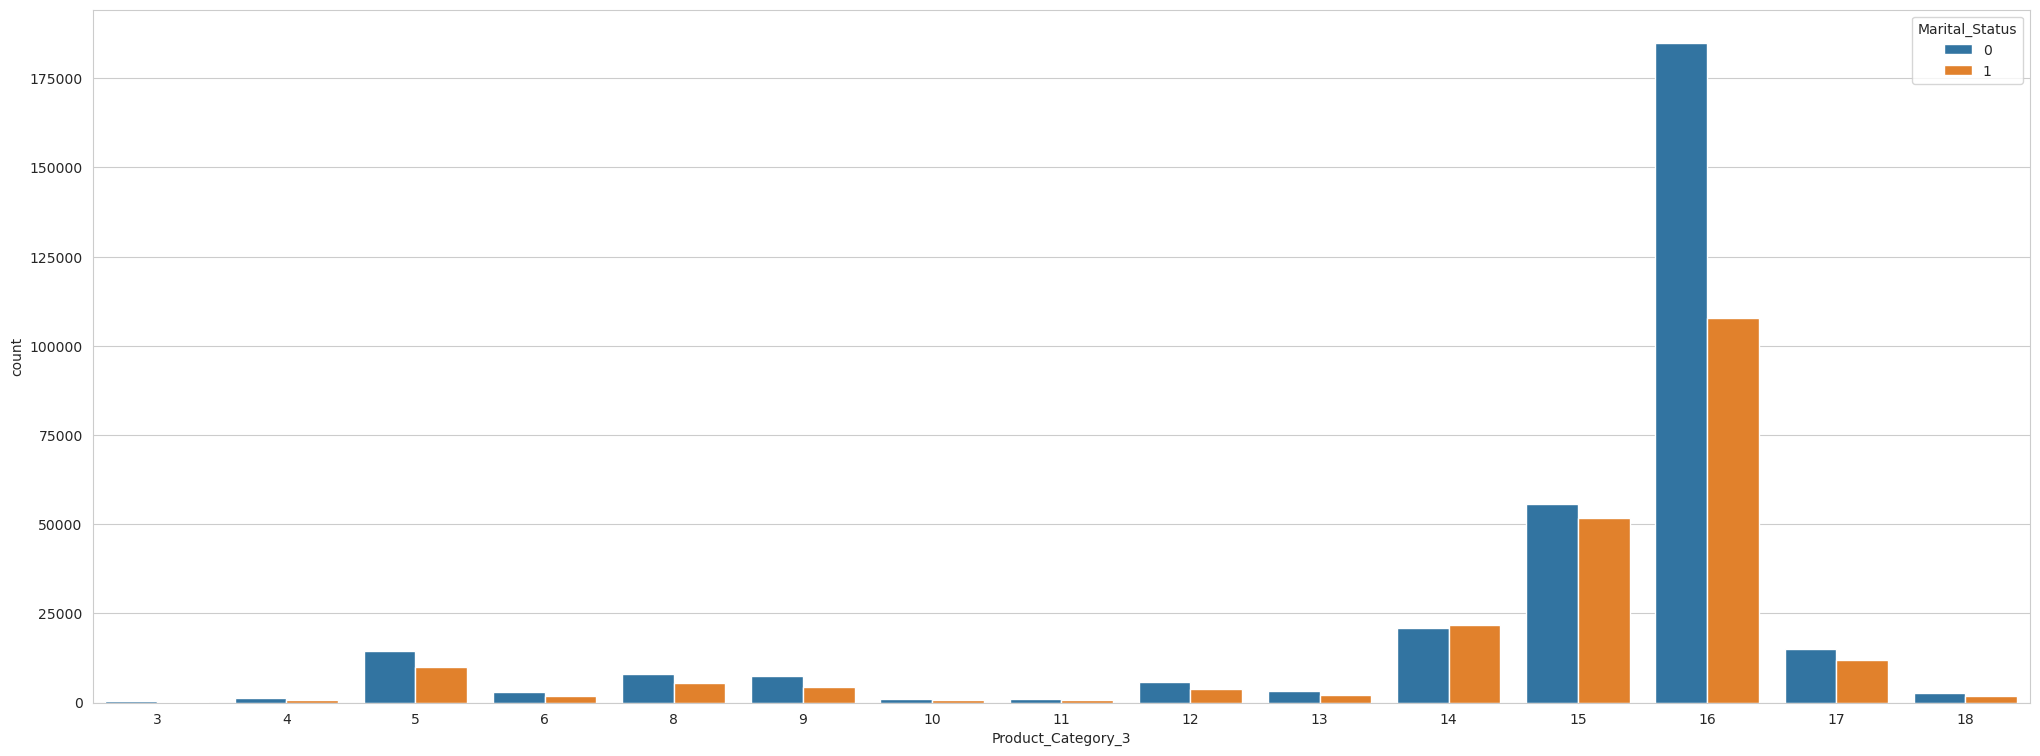

In [62]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday,x='Product_Category_3',hue='Marital_Status')

Both Married and unmarried people purchase more product of 16

##### Countplot with Age v/s other

<Axes: xlabel='Gender', ylabel='count'>

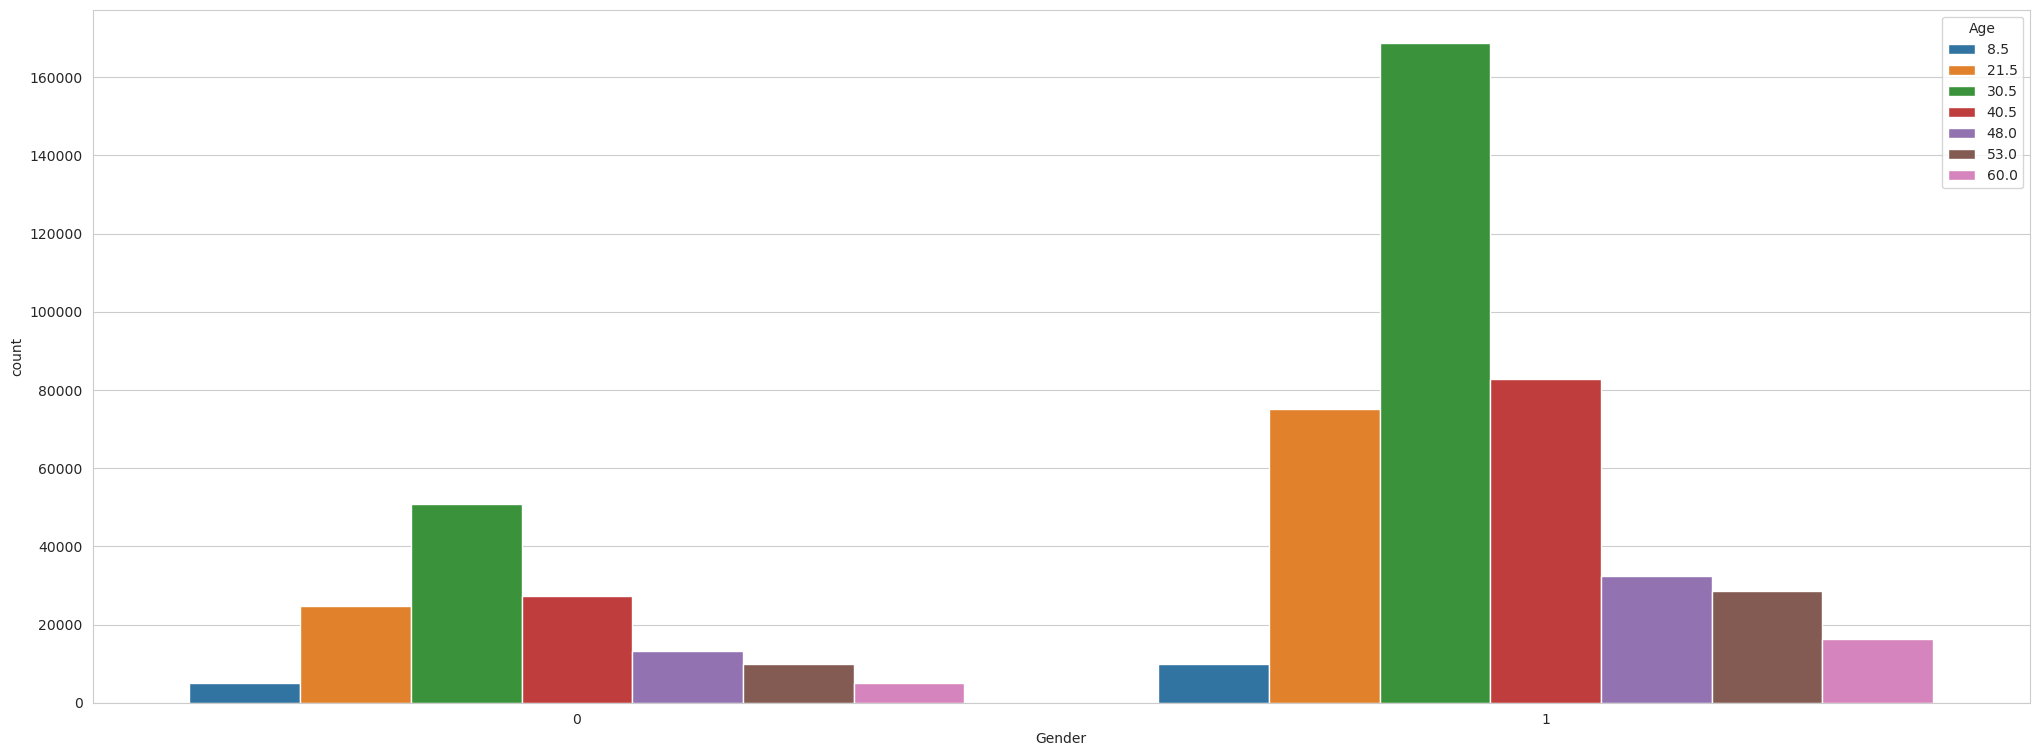

In [63]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday, x='Gender',hue='Age')

In both Gender the age group 25-35 (30.5) are more likely to purchase product

<Axes: xlabel='Occupation', ylabel='count'>

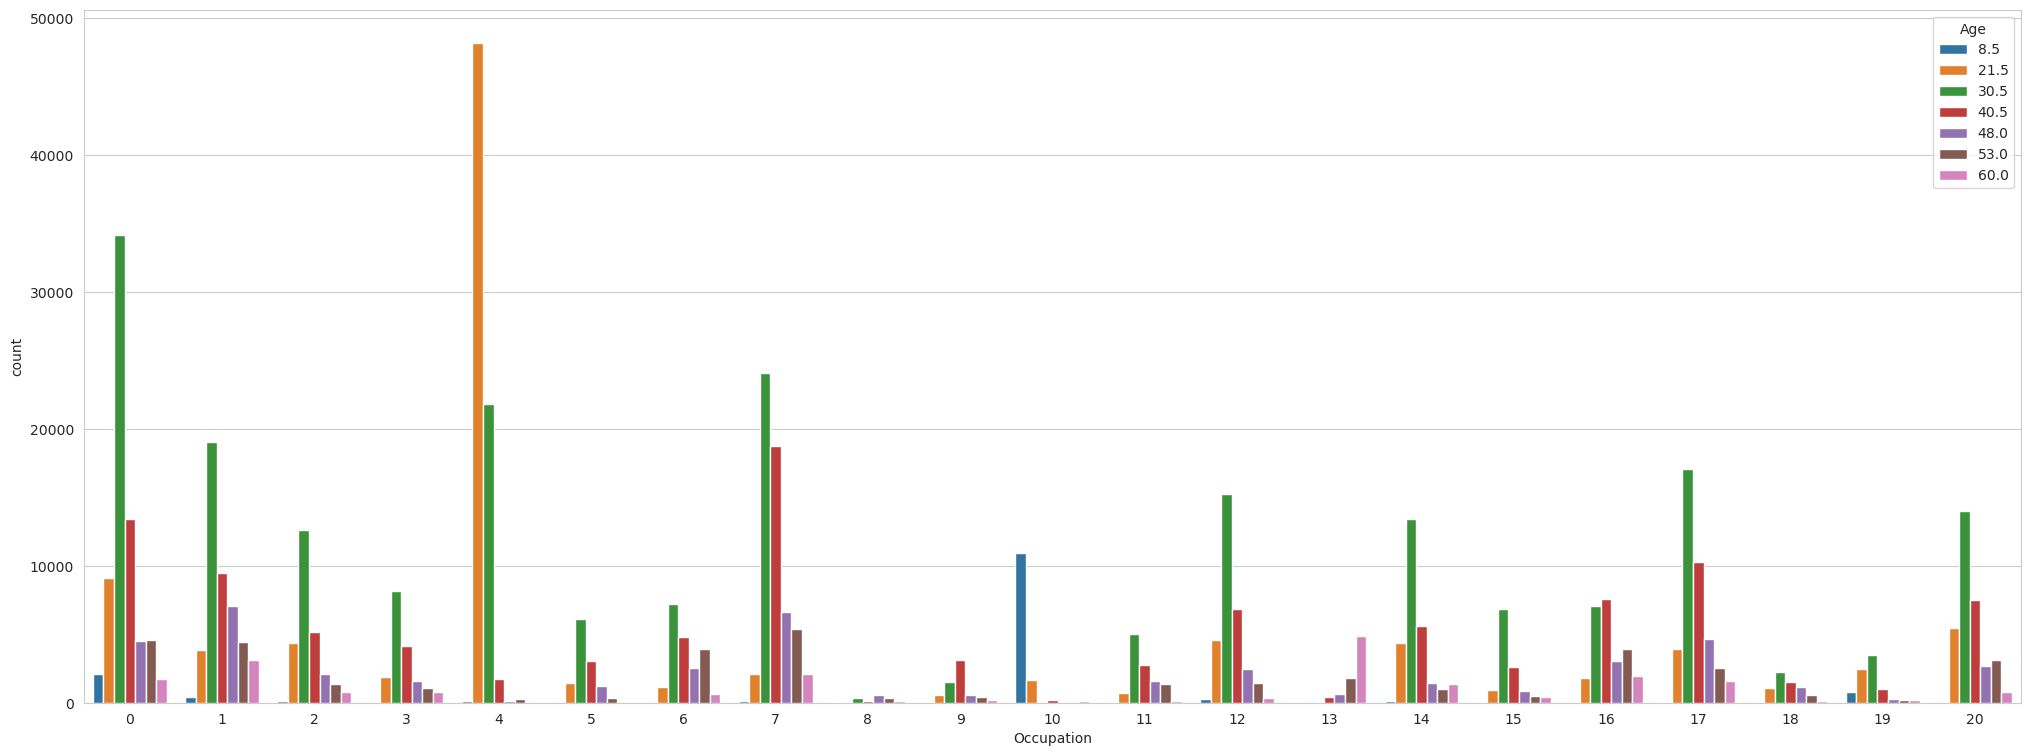

In [64]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday, x='Occupation',hue='Age')

age group 36-45 (40.5) with occupation 4 purchase more

<Axes: xlabel='Marital_Status', ylabel='count'>

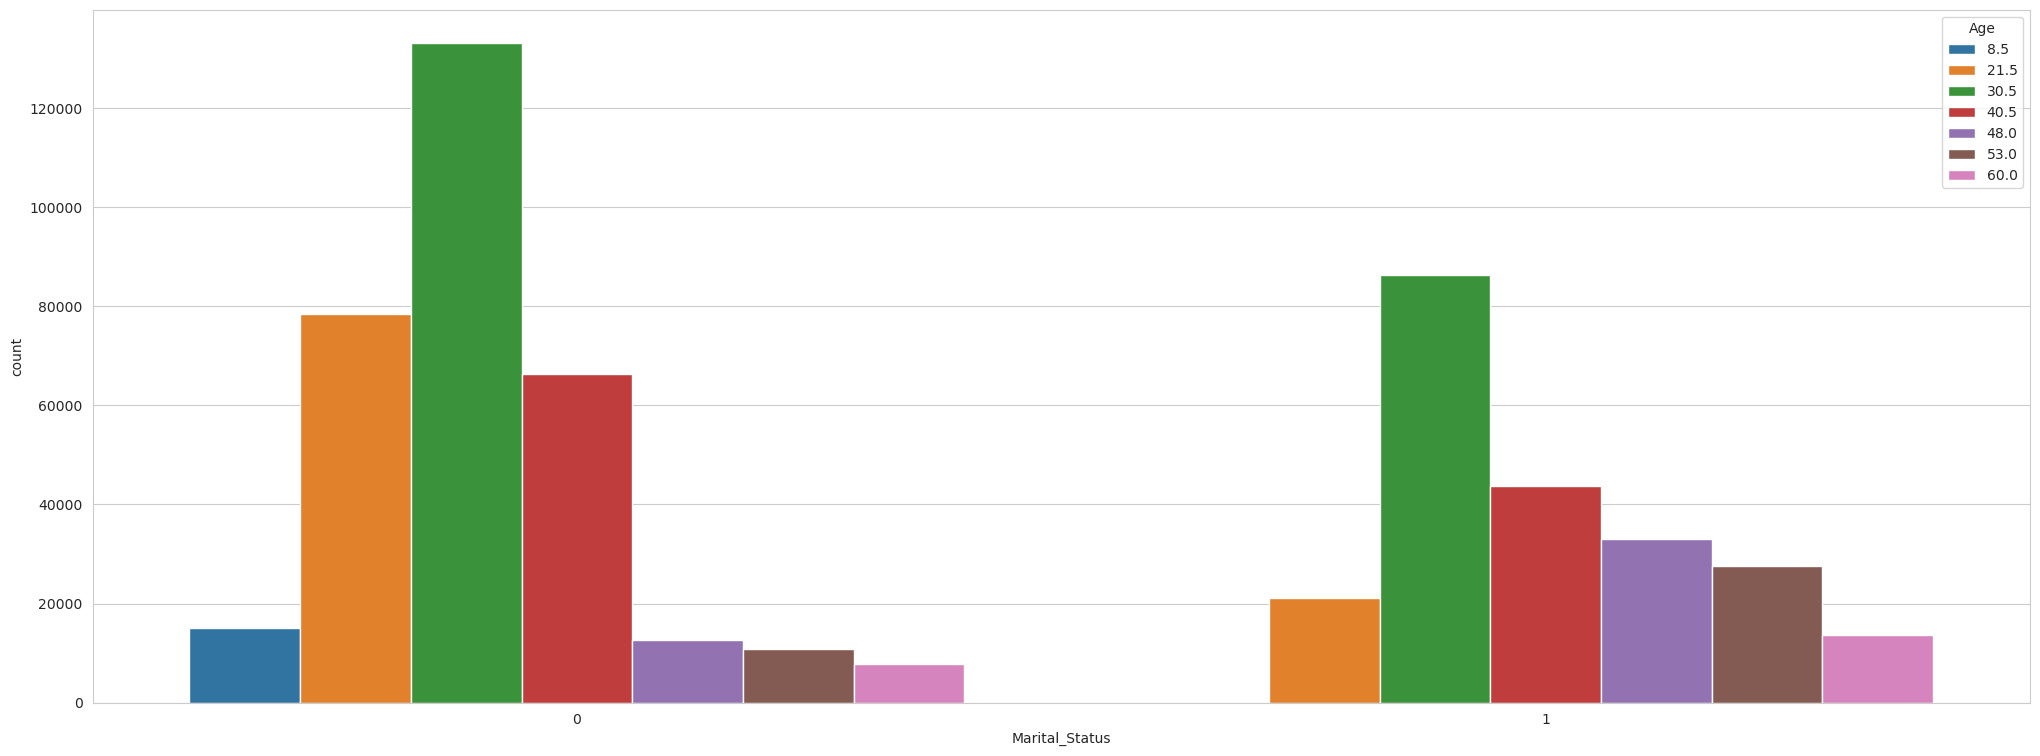

In [65]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday, x='Marital_Status',hue='Age')

In both marital status age group 30.5 are more

<Axes: xlabel='City_Category', ylabel='count'>

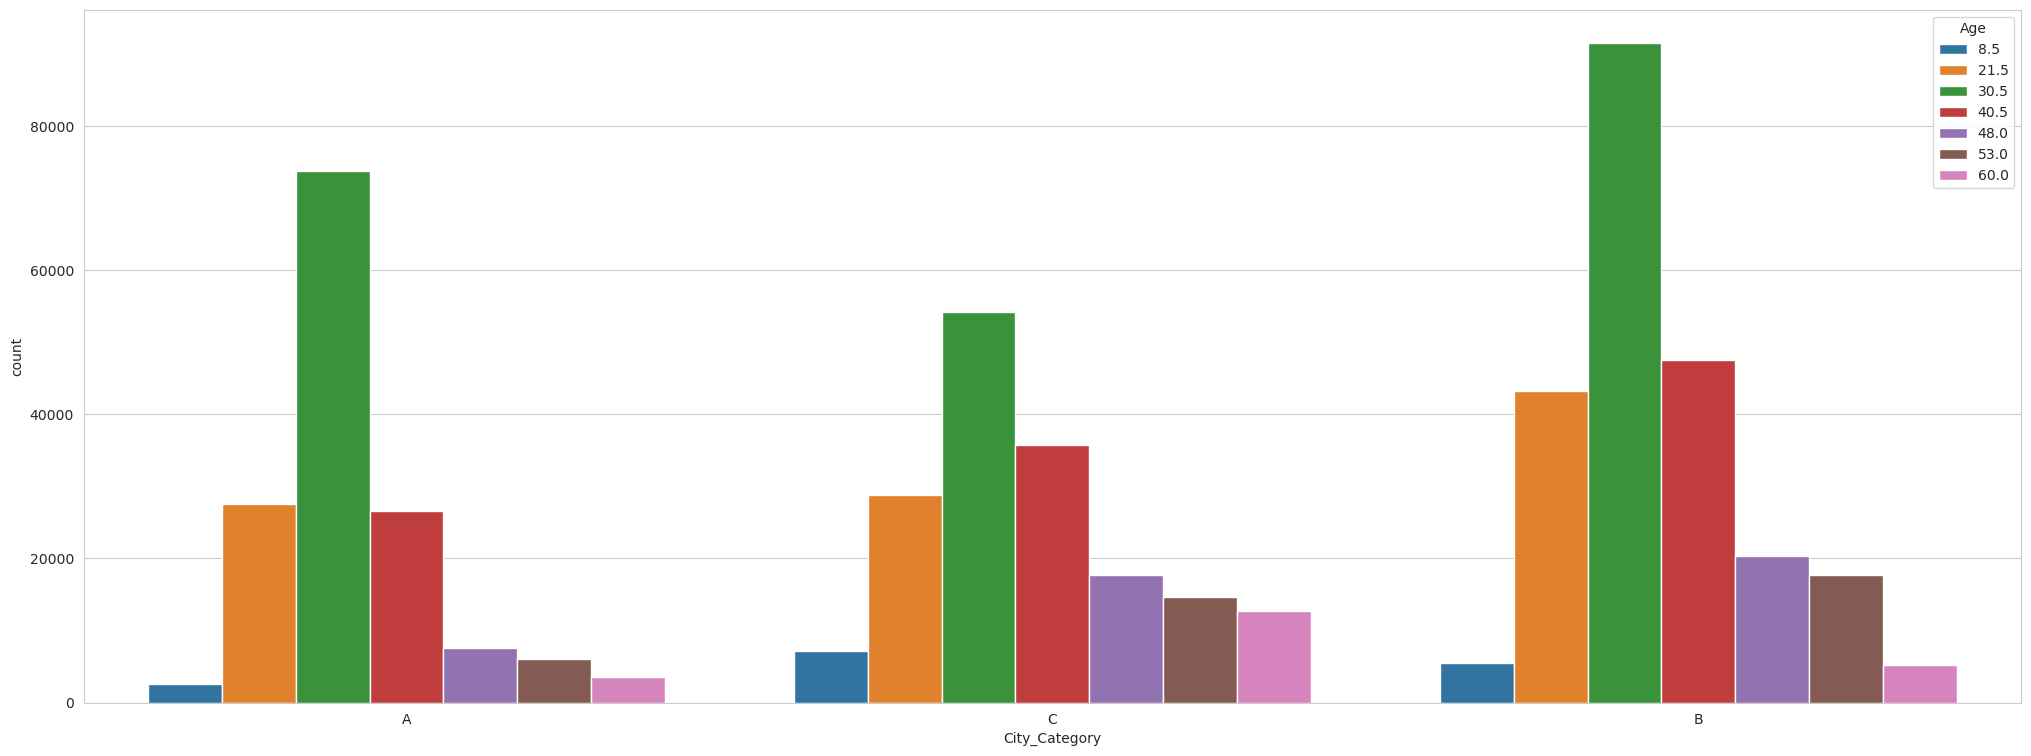

In [66]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.countplot(data=b_friday, x='City_Category',hue='Age')

In all City_category age group 30.5 are more likely to purchase product

<Axes: xlabel='Gender', ylabel='Age'>

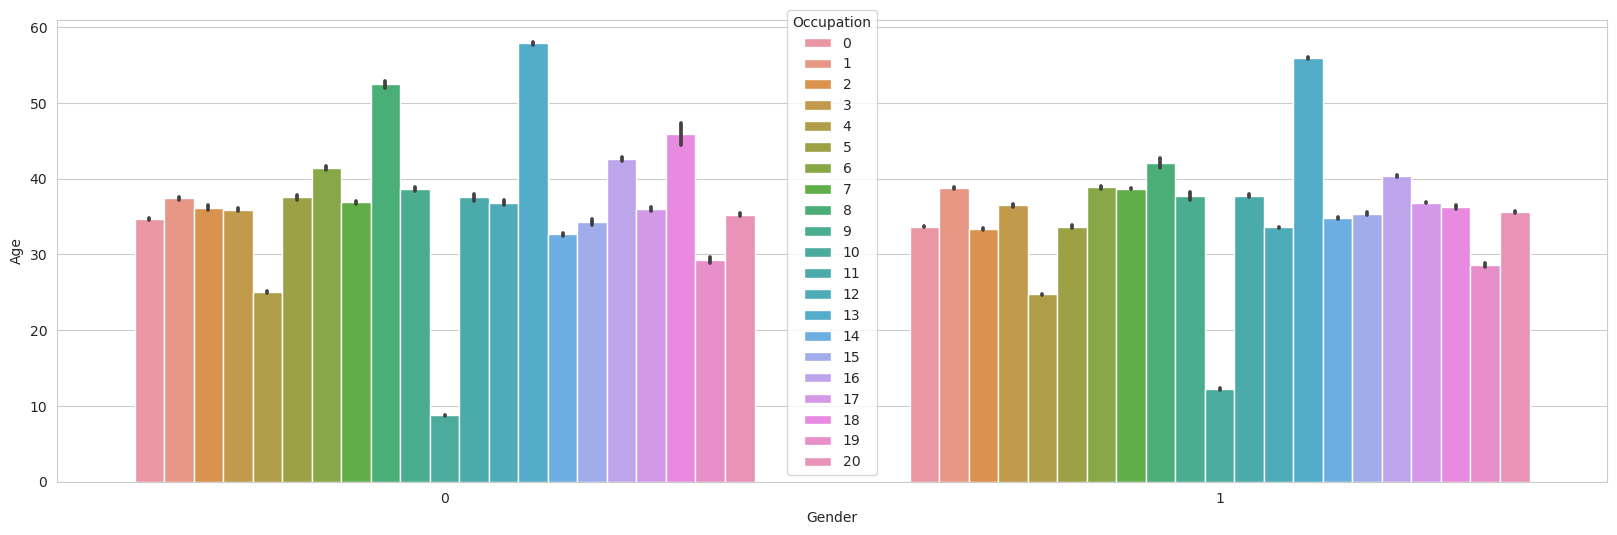

In [67]:
plt.figure(figsize=(20,6))
sns.barplot(data=b_friday,y='Age',hue='Occupation',x='Gender')

In both Gender with age group 51-55 and 55+ having occupation 13 are more

Thank You...!